# Clothing Company Dataset Business - 2A

### Datasets Information

### Goals:
If your dataset is 2A, you are working at an e-commerce  clothing company and your supervisor requested you to cluster the customers to identify what kind of product  promotions would be suitable for them
1. [LO 1,2,3 – 10 Points] Perform Exploratory Data Analysis (EDA) on the dataset. Identify the key  findings and anomalies existing in the dataset. Make sure to handle the anomalies accordingly! 
2. [LO 1,2,3 – 10 Points] Train a K-Means clustering model and fine-tune it using at least 2 metrics! Visualize the resulting clustered data! 
3. [LO 1,2,3,4 – 10 Points] Analyze the characteristics of each customer cluster! 
4. [LO 4 – 5 Points] Make a presentation video explaining the key points of your analysis (max. 5  minutes)! 



### Variables

1. Customer’s ID: the customer’s ID 
2. Birth Date: the birth date of the customer
3. Gender: the gender of the customer 
4. Item Purchased: the type of item purchased by the customer 
5. Category: the purchased item’s category 
6. Purchase Amount (USD): amount spent by the customer for the item (USD) 
7. Location: the customer’s location 
8. Size: the size of the item 
9. Color: the color of the item 
10. Season: the season when the purchase occurred 
11. Review Rating: the rating left by the customer 
12. Subscription Status: the customer’s subscription status 
13. Payment Method: the payment method used by the customer 
14. Shipping Type: the shipment type of the purchase 
15. Discount Applied: whether discounts were applied to the purchase (yes/no) 
16. Promo Code Used: whether promo codes were used for the purchase (yes/no) 
17. Previous Purchases: the last purchase made by the customer (month) 
18. Preferred Payment Method: the preferred payment method of the customer 
19. Frequency of Purchases: the average frequency of the customer’s purchases last year 


### Step 1 : importing library and datasets

In [1]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as gro
from plotly.subplots import make_subplots
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random 

# Preprocess
from sklearn.preprocessing import StandardScaler,RobustScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
# Training And Evalution
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,silhouette_samples


import matplotlib.cm as cm
from sklearn.decomposition import PCA

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [2]:
datasets = pd.read_csv("/Users/aaron/Documents/Semester 3/UAS/ML/2A.tsv",sep='\t')
datasets

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,1984/02/23,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,1972/02/11,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,1978/05/02,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,1980/03/30,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


### Step 2 : EDA

**a. see the unique value and data type of each columns**

In [3]:
for column in datasets.columns:
    unique_values = datasets[column].nunique()
    print(f"{column}: {unique_values}")

Customer ID: 3900
Birth Date: 3534
Gender: 4
Item Purchased: 25
Category: 4
Purchase Amount (USD): 81
Location: 50
Size: 4
Color: 25
Season: 4
Review Rating: 26
Subscription Status: 2
Payment Method: 6
Shipping Type: 6
Discount Applied: 2
Promo Code Used: 2
Previous Purchases: 50
Preferred Payment Method: 6
Frequency of Purchases: 7


In [4]:
print(datasets.dtypes)

Customer ID                   int64
Birth Date                   object
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object


From the information above, let's see what we can infer for each column:

1. CUSTOMER ID: For the ID column, we’ll remove it straight away because it’s a unique identifier variable that has no relation or connection to other variables. But, how come the unique value is 5? Even when adding null, it still doesn’t reach 5, so we’ll check that later.
2. Birth Date: We’ll convert this to a numerical value, which is age, as it will be more useful and easier to analyze later.
3. Gender: Overall, based on unique values, there seems to be some typos or null values.
4. Item Purchased: The unique values should show 25 items being sold (if there are no nulls).
5. Category: The category type seems to show 4 categories for the 25 items.
6. Purchase Amount (USD): Safe in terms of value, moving on to check for missing values.
7.Location: Safe in terms of value, moving on to check for missing values.
8. Size: Safe in terms of value, moving on to check for missing values.
9. Color: Safe in terms of value, moving on to check for missing values.
10. Season: Safe in terms of value, moving on to check for missing values.
11. Review Rating: Safe in terms of value, moving on to check for missing values.
12. Subscription Status: Safe in terms of value, and it seems to be Y and N, meaning there are no nulls.
13. Payment Method: There are 6 types of payment used, assuming no nulls.
14. Shipping Type: Similar to payment, there are 6 types of shipping methods, assuming no nulls.
15. Discount Applied: Safe, no nulls.
16. Promo Code Used: Safe, no nulls.
17. Previous Purchases: Based on unique values and type, this should be safe, just need to check for nulls.
18. Preferred Payment Method: The preferred payment methods seem safe, as there are 6 options, each with its preference. From this, we can also identify the payment method that should be used later.
19. Frequency of Purchases: Safe in terms of value and data type.

**b. dropping duplicates ( if there are any)**

In [5]:
datasets.duplicated().sum()

0

secara duplicates aman jadi tidak ada data yang double sehingga aman banget nih untuk kita lanjut ke NULL
no duplicates indicates that there's not gonna be a mainstream insight that we gonna get from each data rows.

**c. dropping unuseful column**

- Remove the id column as it serves only as an identifier.
- Remove the colors and location columns because these attributes may not be relevant for determining the appropriate product promotion for customers. Colors are typically aesthetic and do not provide significant information about the effectiveness of specific promotions, such as discounts or special offers. Similarly, location is not relevant since differences in location do not necessarily determine price differences.perbedaan harga.

In [6]:
# drop kolom id 
datasets.drop(["Customer ID"], axis="columns", inplace=True)
datasets.drop(["Location"], axis="columns", inplace=True)
datasets.drop(["Color"], axis="columns", inplace=True)
datasets

,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1969/03/05,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2005/07/01,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,1974/12/01,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,2003/11/21,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,1979/09/13,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,1984/02/23,Female,Hoodie,Clothing,28,L,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,1972/02/11,Female,Backpack,Accessories,49,L,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,1978/05/02,Female,Belt,Accessories,33,L,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,1980/03/30,Female,Shoes,Footwear,77,S,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


**d. Gender???**

In [7]:
for column in datasets.columns:
    unique_values = datasets[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values ({len(unique_values)}): {unique_values}")
    print("-" * 50)

Column: Birth Date
Unique Values (3534): ['1969/03/05' '2005/07/01' '1974/12/01' ... '1972/02/11' '1978/05/02'
 '1980/03/30']
--------------------------------------------------
Column: Gender
Unique Values (4): ['Male' 'M' 'Female' 'f']
--------------------------------------------------
Column: Item Purchased
Unique Values (25): ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
--------------------------------------------------
Column: Category
Unique Values (4): ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
--------------------------------------------------
Column: Purchase Amount (USD)
Unique Values (81): [ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  

TYpo problems 

In [8]:
datasets['Gender'] = datasets['Gender'].replace({'M': 'Male', 'f': 'Female'})
unique_values = datasets['Gender'].unique()
for value in unique_values:
    print(value)

Male
Female


sekarang tinggal masalah null untuk EDA

**e. handling missing values**

In [9]:
# Check NA dan Percentage
datasets.isna().sum()
percentage_na = datasets.isna().sum()/len(datasets)
print(percentage_na*100)

Birth Date                  0.0
Gender                      0.0
Item Purchased              0.0
Category                    0.0
Purchase Amount (USD)       0.0
Size                        0.0
Season                      0.0
Review Rating               0.0
Subscription Status         0.0
Payment Method              0.0
Shipping Type               0.0
Discount Applied            0.0
Promo Code Used             0.0
Previous Purchases          0.0
Preferred Payment Method    0.0
Frequency of Purchases      0.0
dtype: float64


THANK GOD THERE ARENT ANY NULL CAUSE IT COULD MAKE THE CLUSTERING A LITTLE BIT HARDER

Alright, if everything is set before moving on to visualization, let's transform the birthday_date column into age, and convert the registration_date into categories:
- Category 1: "Long-term user" (registration_date before 2019)
- Category 2: "Moderate-term user" (registration_date between 2020 and 2022)
- Category 3: "New user" (registration_date between 2023 and 2024).

**f. transforming dates to ages**

In [10]:
def convertcolumn(df):
    today = datetime.today()
    df['Birth Date'] = pd.to_datetime(df['Birth Date'], format='%Y/%m/%d', errors='coerce')
    df['Age'] = (today - df['Birth Date']).dt.days // 365  
    df.drop(columns=['Birth Date'], inplace=True)
    df['Age'] = df['Age'].astype('int64')
    
    return df

convertcolumn(datasets)

,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age
0,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,55
1,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,19
2,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50
3,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,21
4,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,28,L,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,40
3896,Female,Backpack,Accessories,49,L,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,52
3897,Female,Belt,Accessories,33,L,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,46
3898,Female,Shoes,Footwear,77,S,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,44


In [11]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    3900 non-null   object 
 1   Item Purchased            3900 non-null   object 
 2   Category                  3900 non-null   object 
 3   Purchase Amount (USD)     3900 non-null   int64  
 4   Size                      3900 non-null   object 
 5   Season                    3900 non-null   object 
 6   Review Rating             3900 non-null   float64
 7   Subscription Status       3900 non-null   object 
 8   Payment Method            3900 non-null   object 
 9   Shipping Type             3900 non-null   object 
 10  Discount Applied          3900 non-null   object 
 11  Promo Code Used           3900 non-null   object 
 12  Previous Purchases        3900 non-null   int64  
 13  Preferred Payment Method  3900 non-null   object 
 14  Frequenc

**g. splitting categorical and numerical column and visualize it**

In [12]:
numeric_data = datasets.select_dtypes(include=[np.number])
numeric_data
categorical_data = datasets.select_dtypes(exclude=[np.number])
categorical_data

,Gender,Item Purchased,Category,Size,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
0,Male,Blouse,Clothing,L,Winter,Yes,Credit Card,Express,Yes,Yes,Venmo,Fortnightly
1,Male,Sweater,Clothing,L,Winter,Yes,Bank Transfer,Express,Yes,Yes,Cash,Fortnightly
2,Male,Jeans,Clothing,S,Spring,Yes,Cash,Free Shipping,Yes,Yes,Credit Card,Weekly
3,Male,Sandals,Footwear,M,Spring,Yes,PayPal,Next Day Air,Yes,Yes,PayPal,Weekly
4,Male,Blouse,Clothing,M,Spring,Yes,Cash,Free Shipping,Yes,Yes,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,L,Summer,No,Cash,2-Day Shipping,No,No,Venmo,Weekly
3896,Female,Backpack,Accessories,L,Spring,No,PayPal,Store Pickup,No,No,Bank Transfer,Bi-Weekly
3897,Female,Belt,Accessories,L,Spring,No,Credit Card,Standard,No,No,Venmo,Quarterly
3898,Female,Shoes,Footwear,S,Summer,No,PayPal,Express,No,No,Venmo,Weekly


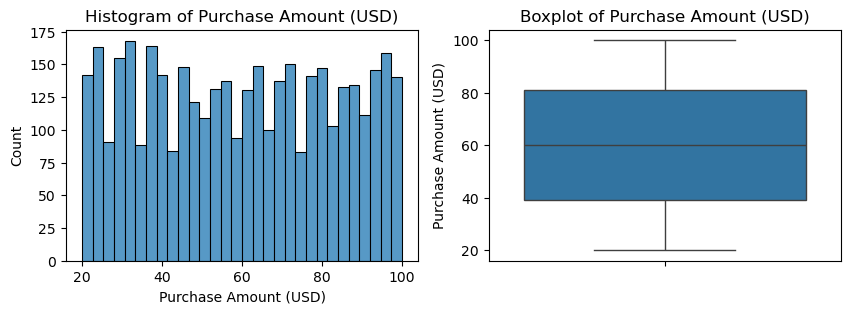

Skewness of Purchase Amount (USD): 0.012701757626433795
Kurtosis of Purchase Amount (USD): -1.236593691266159


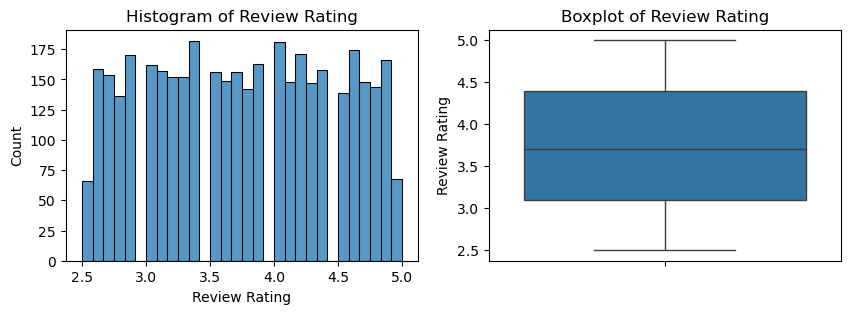

Skewness of Review Rating: 0.00452459644246527
Kurtosis of Review Rating: -1.1796283021299137


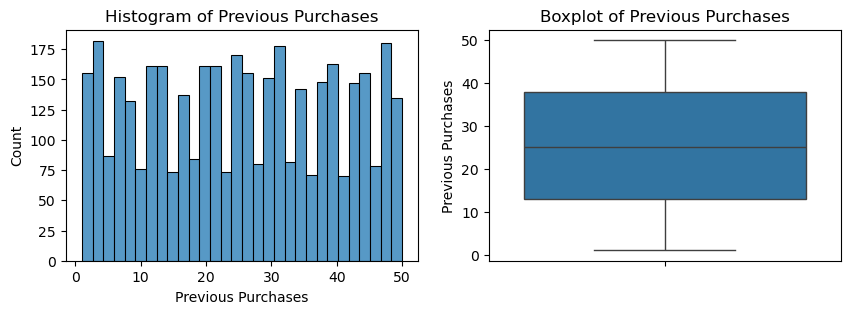

Skewness of Previous Purchases: 0.0031211555127652127
Kurtosis of Previous Purchases: -1.1901873846405375


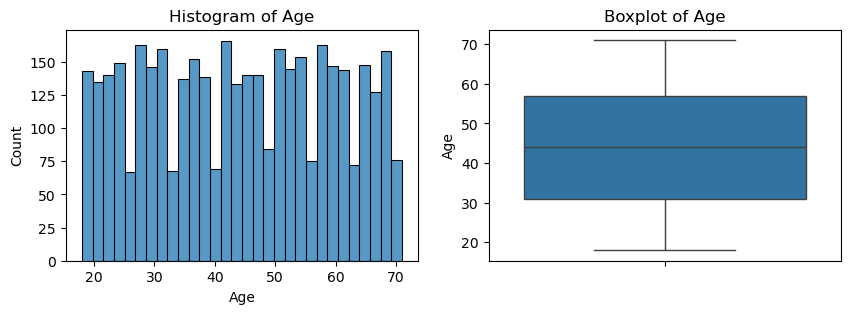

Skewness of Age: -0.005994058773893162
Kurtosis of Age: -1.1933310417001388


In [13]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print(f'Skewness of {col}:', df[col].skew())
        print(f'Kurtosis of {col}:', df[col].kurt())

check_distribution_outliers(datasets, numeric_data)

From the visualization of the numerical data, let’s analyze each column:
- Purchase Amount:
The distribution of the purchase amount is relatively normal and flat, with a negative kurtosis value. The range of prices is observed to be between 20 and 100.
- Review Rating:
Similar to purchase amount, it has a normal and relatively flat distribution with negative kurtosis. The ratings range from 2.5 to 5, indicating that customers generally rate the quality of clothing accessories and their categories quite positively.
- Previous Purchase:
The distribution of previous purchases also appears normal, with negative kurtosis and a relatively flat distribution. The range is between 3 and 50.
- Age:
The age distribution leans more to the left (indicating younger users) compared to other columns, which lean more to the right. Nevertheless, the negative kurtosis value suggests a relatively flat distribution. The range is observed to span from around 10 to 70+.

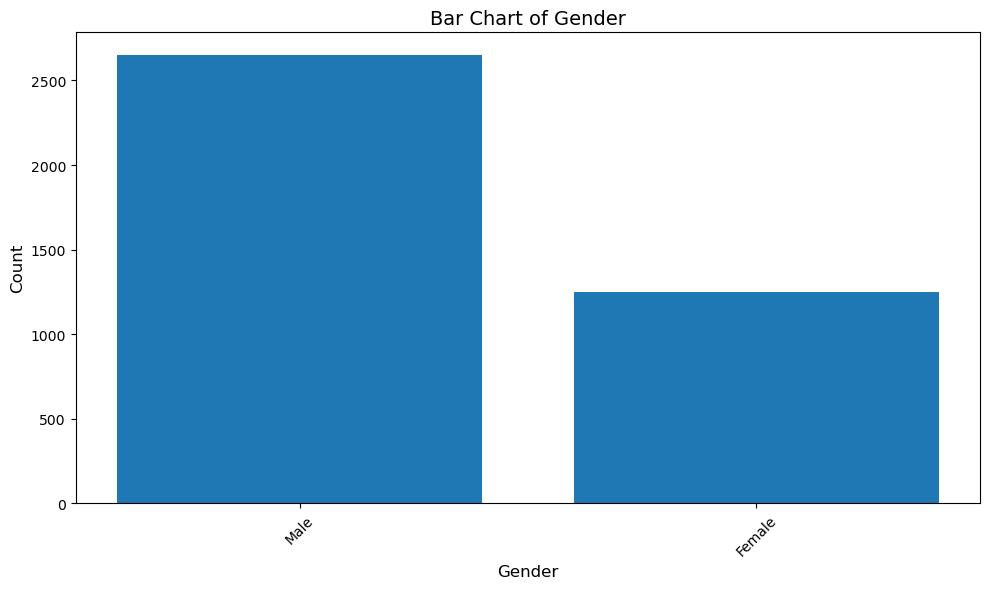

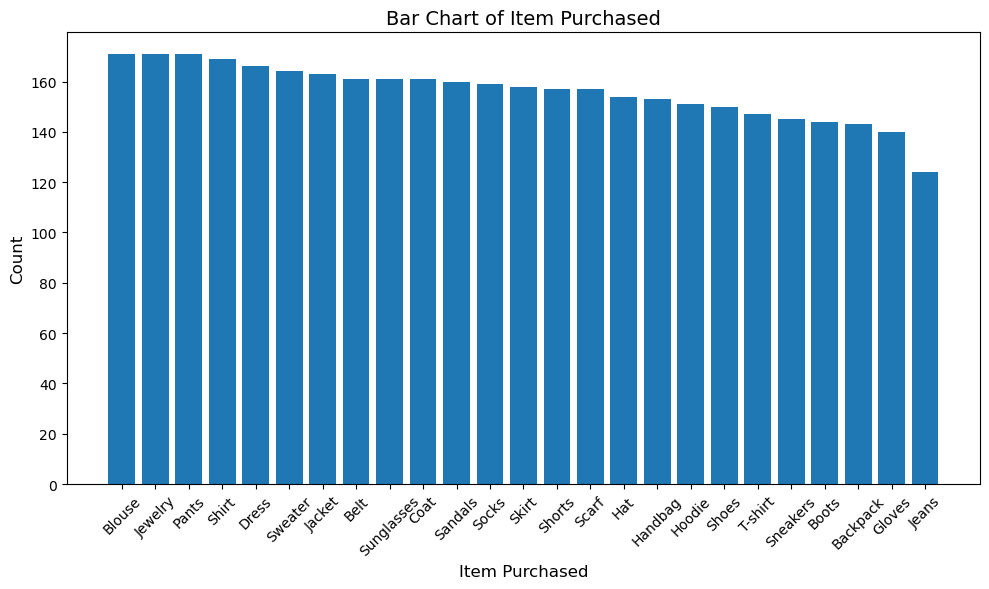

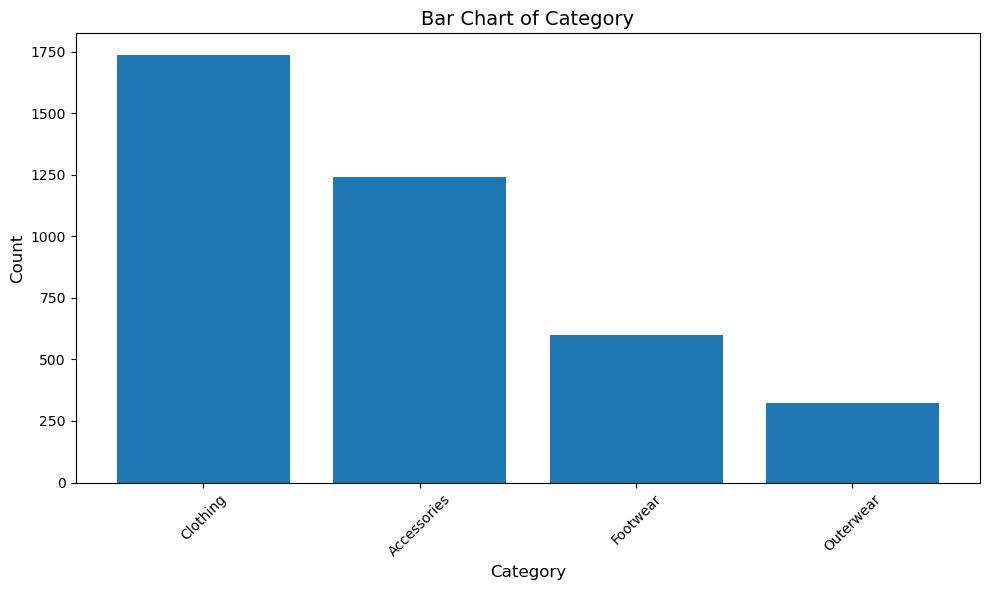

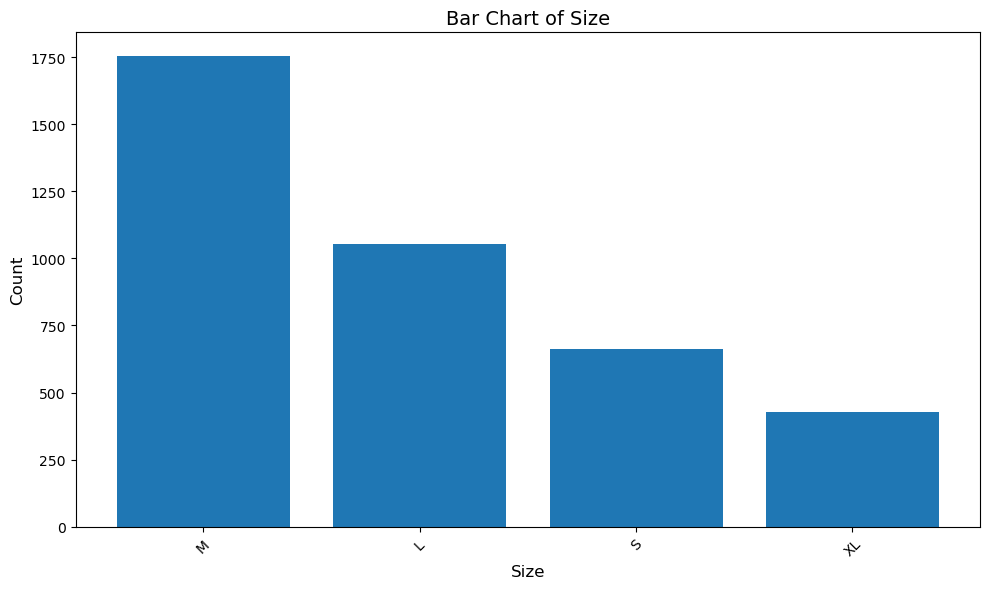

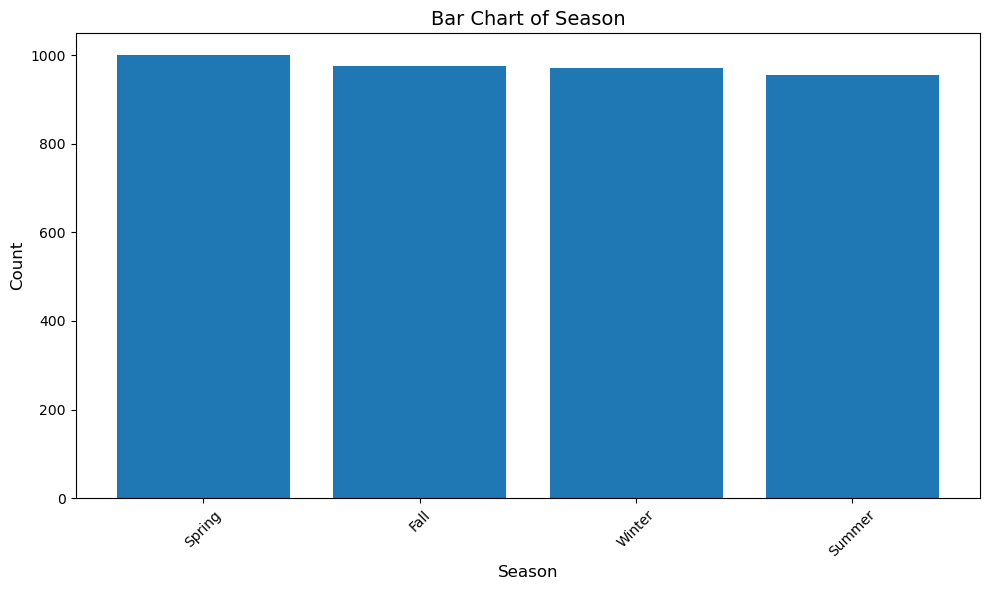

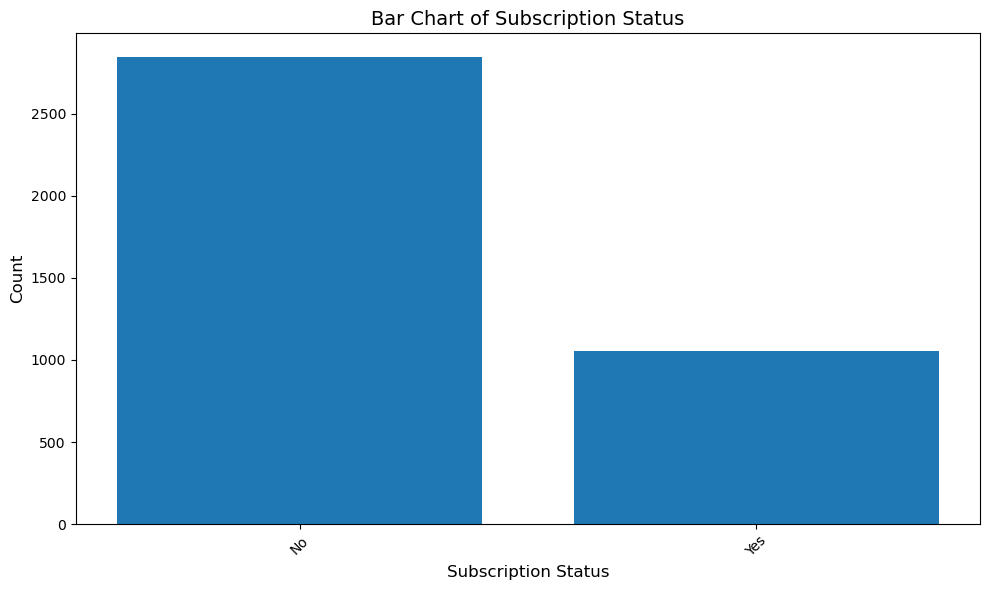

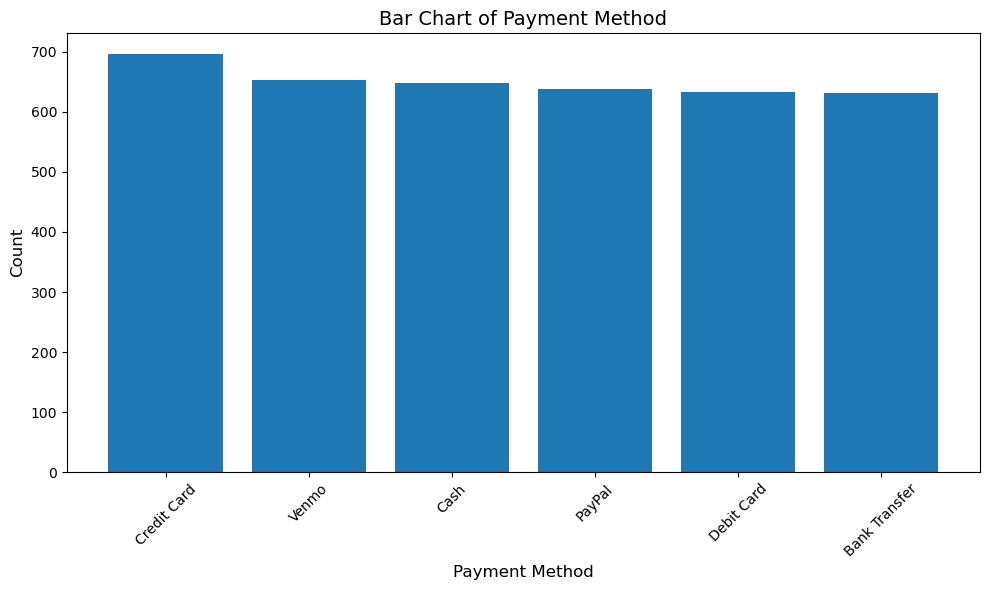

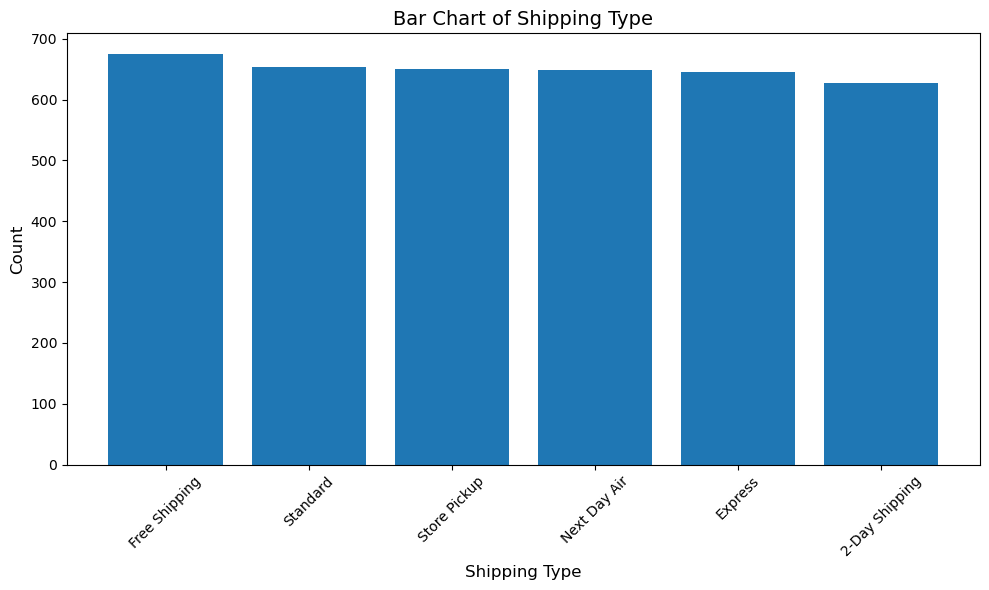

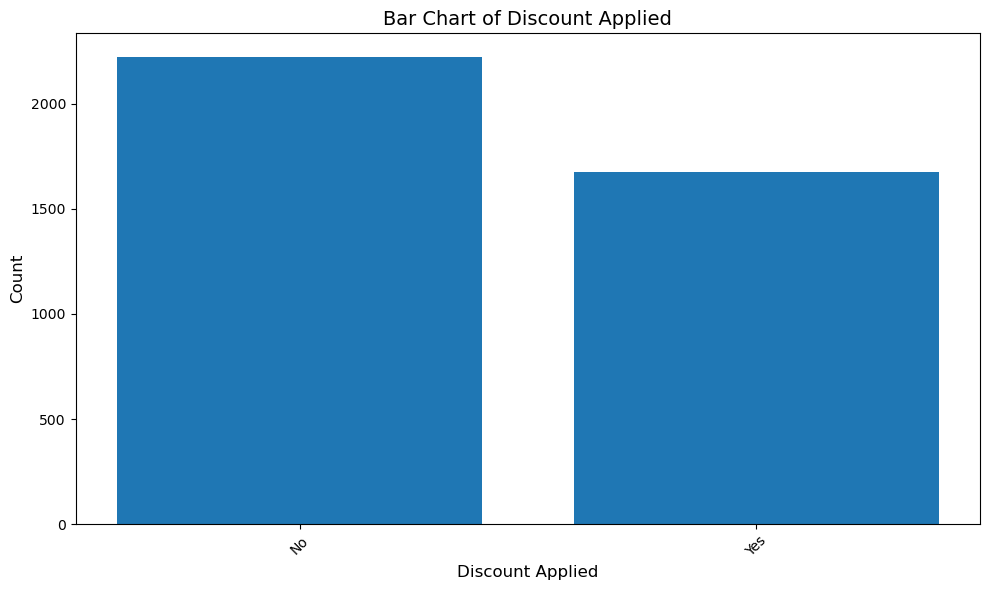

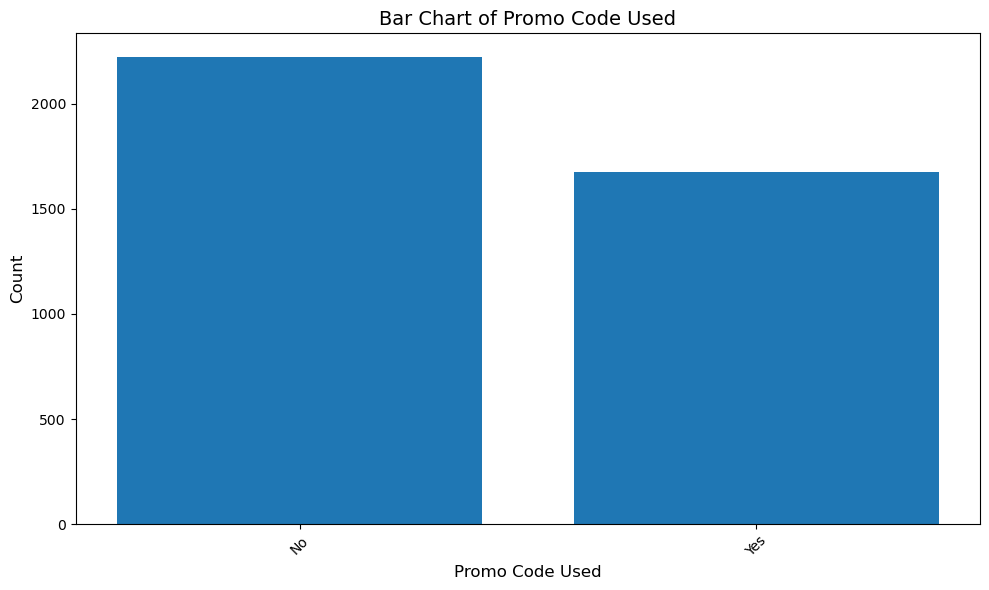

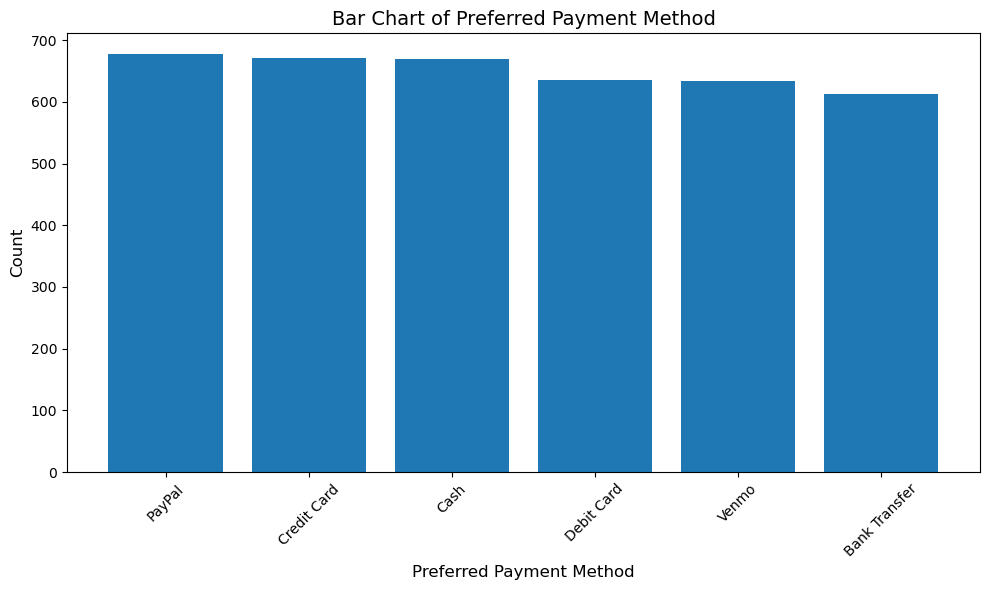

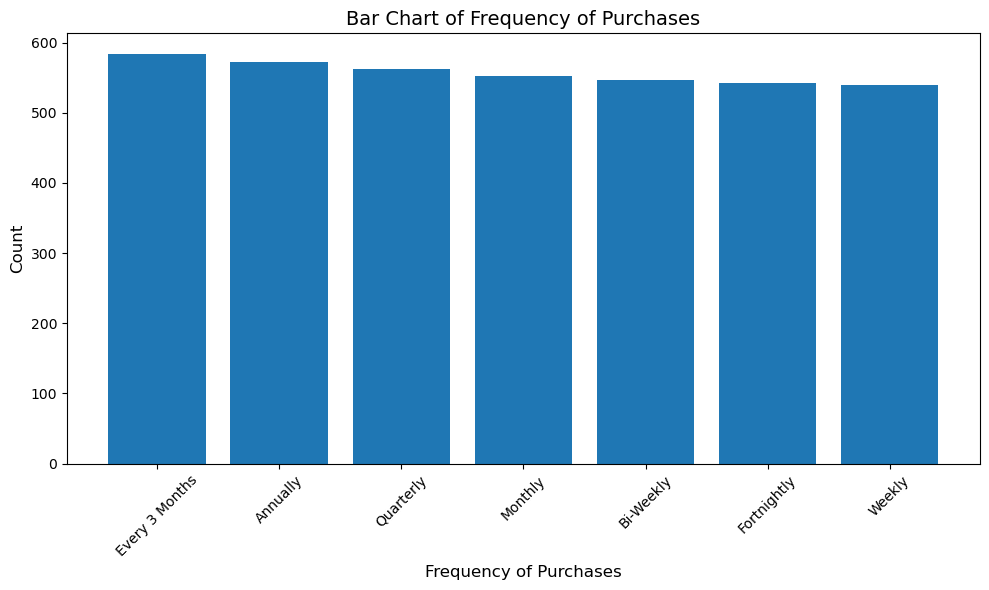

In [14]:
def plot_ordinal(data):
    # Looping per kolom
    for column in data.columns:
        # Menghitung frekuensi dari setiap nilai unik di kolom ordinal
        value_counts = data[column].value_counts().reset_index()
        value_counts.columns = ['value', 'count']

        # Membuat Bar Chart dengan warna berbeda untuk setiap bar menggunakan matplotlib
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts['value'], value_counts['count'])
        plt.title(f'Bar Chart of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Menampilkan grafik
        plt.show()
plot_ordinal(categorical_data)

- Frequency of Purchases:
There’s an issue where "every 3 months" should be labeled as "quarterly," and "fortnightly" should be labeled as "bi-weekly." The column will be updated to reflect these correct terminologies.
- Preferred Payment Methods and Payment Methods:
To simplify, we’ll consolidate Venmo and PayPal into a single category called Virtual Account. This reduces redundancy and groups similar payment types.
- Discount and Promo Code:
These two columns will be merged into a single column named Promotion, making it easier to identify and differentiate between promotions and discounts while also saving space in the dataset.
- Other Columns:
Category, Size, and Subscription Status:
Although these columns show imbalances in their distributions, this is expected:
For Category, clothing tends to have more diverse options, leading to an uneven spread.
For Size, it’s common for the majority to fall into medium (M) and large (L), as they are more standard.
For Subscription Status, the imbalance may indicate that the benefits of subscribing are perceived as not worthwhile, resulting in fewer subscribers. Further analysis is required to confirm this hypothesis.
Overall, the other columns seem well-distributed and do not need immediate adjustment.

In [15]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    3900 non-null   object 
 1   Item Purchased            3900 non-null   object 
 2   Category                  3900 non-null   object 
 3   Purchase Amount (USD)     3900 non-null   int64  
 4   Size                      3900 non-null   object 
 5   Season                    3900 non-null   object 
 6   Review Rating             3900 non-null   float64
 7   Subscription Status       3900 non-null   object 
 8   Payment Method            3900 non-null   object 
 9   Shipping Type             3900 non-null   object 
 10  Discount Applied          3900 non-null   object 
 11  Promo Code Used           3900 non-null   object 
 12  Previous Purchases        3900 non-null   int64  
 13  Preferred Payment Method  3900 non-null   object 
 14  Frequenc

In [16]:
datasets['Payment Method'] = datasets['Payment Method'].replace({
    'PayPal': 'Virtual Account',
    'Venmo': 'Virtual Account'
})

datasets['Preferred Payment Method'] = datasets['Preferred Payment Method'].replace({
    'PayPal': 'Virtual Account',
    'Venmo': 'Virtual Account'
})

datasets['Frequency of Purchases'] = datasets['Frequency of Purchases'].replace({
    'Fortnightly': 'Bi-Weekly',
    'Every 3 Months': 'Quarterly'
})

print(datasets['Payment Method'].value_counts())
print(datasets['Preferred Payment Method'].value_counts())
print(datasets['Frequency of Purchases'].value_counts())

Payment Method
Virtual Account    1291
Credit Card         696
Cash                648
Debit Card          633
Bank Transfer       632
Name: count, dtype: int64
Preferred Payment Method
Virtual Account    1311
Credit Card         671
Cash                670
Debit Card          636
Bank Transfer       612
Name: count, dtype: int64
Frequency of Purchases
Quarterly    1147
Bi-Weekly    1089
Annually      572
Monthly       553
Weekly        539
Name: count, dtype: int64


In [17]:
def combine_promotion(row):
    if row['Discount Applied'] == 'Yes' and row['Promo Code Used'] == 'Yes':
        return 'Both'
    elif row['Discount Applied'] == 'Yes':
        return 'Discount'
    elif row['Promo Code Used'] == 'Yes':
        return 'Promo Code'
    else:
        return 'None'
datasets['Promotion'] = datasets.apply(combine_promotion, axis=1)
datasets

,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age,Promotion
0,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Virtual Account,Bi-Weekly,55,Both
1,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Bi-Weekly,19,Both
2,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50,Both
3,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,Virtual Account,Next Day Air,Yes,Yes,49,Virtual Account,Weekly,21,Both
4,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,Virtual Account,Annually,45,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,28,L,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Virtual Account,Weekly,40,None
3896,Female,Backpack,Accessories,49,L,Spring,4.5,No,Virtual Account,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,52,None
3897,Female,Belt,Accessories,33,L,Spring,2.9,No,Credit Card,Standard,No,No,24,Virtual Account,Quarterly,46,None
3898,Female,Shoes,Footwear,77,S,Summer,3.8,No,Virtual Account,Express,No,No,24,Virtual Account,Weekly,44,None


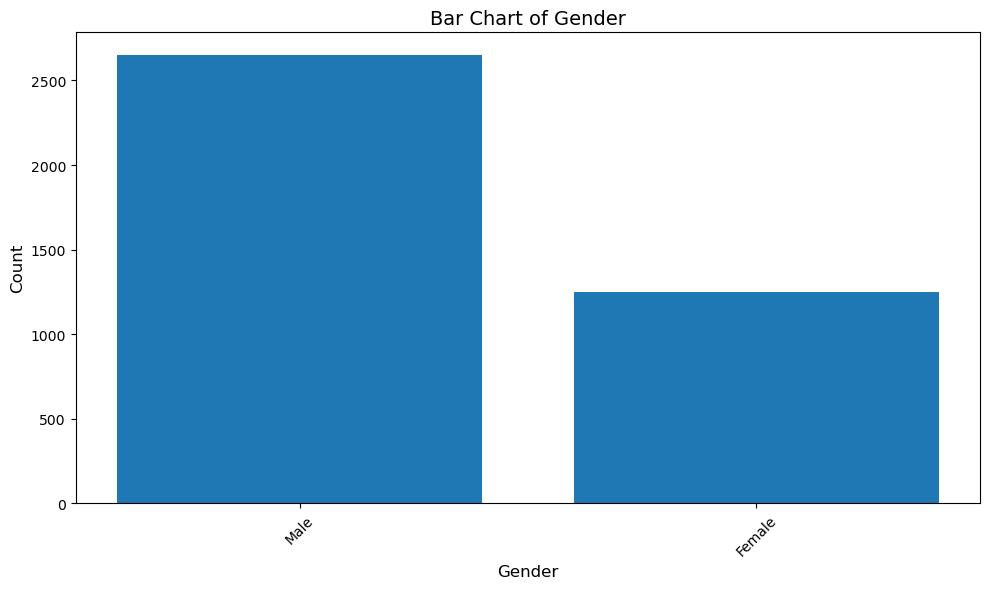

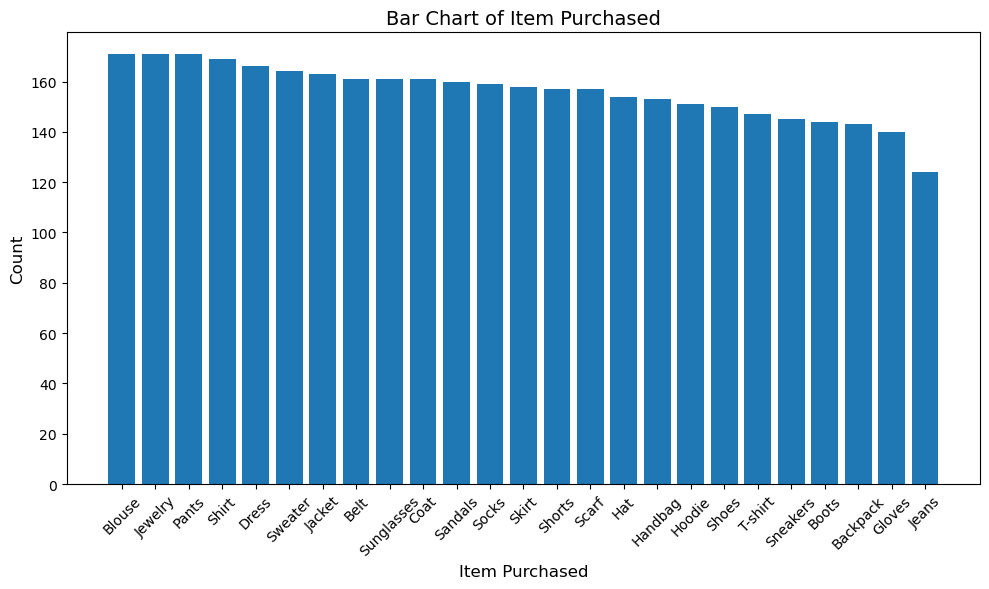

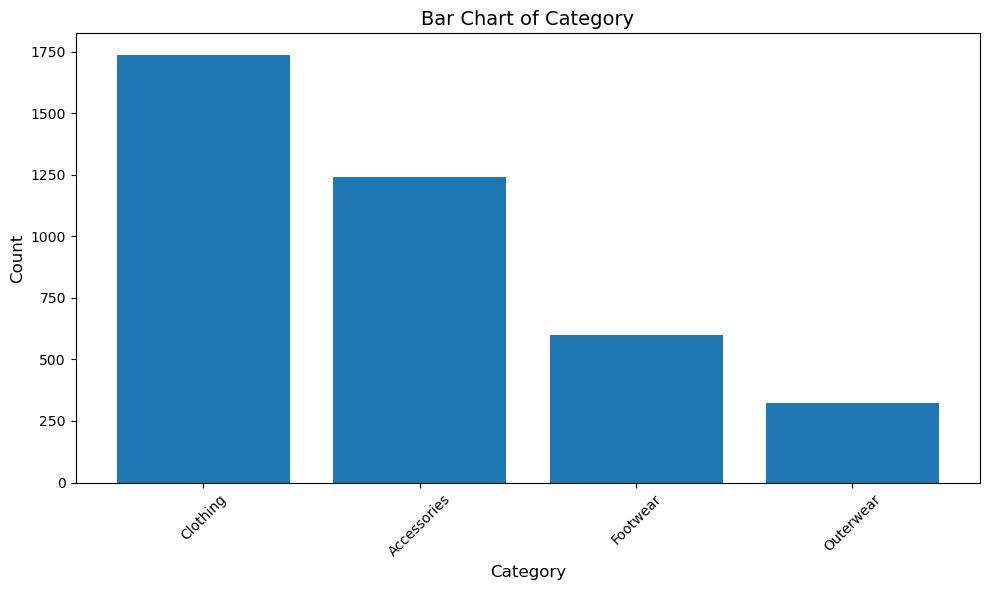

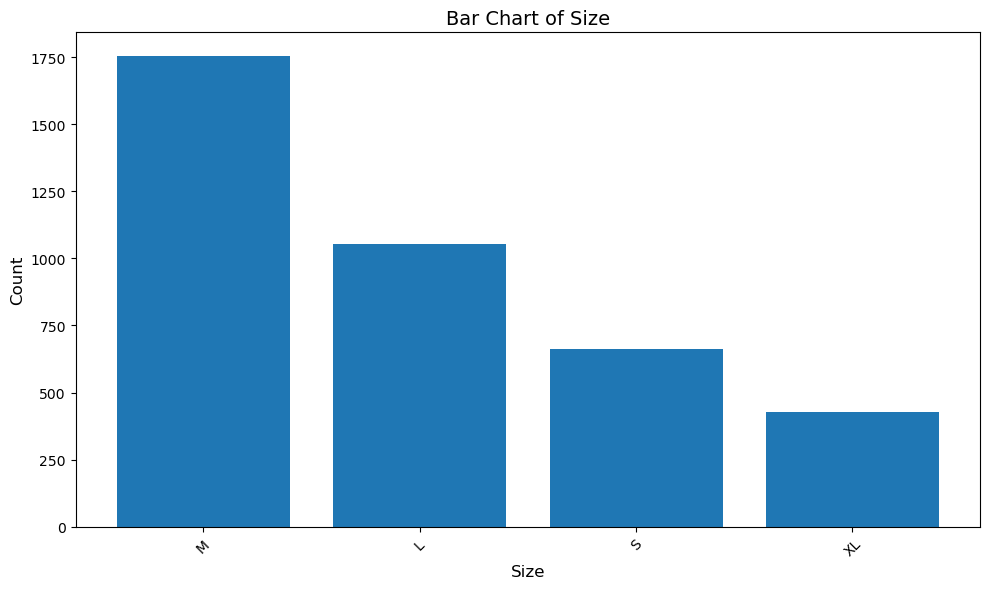

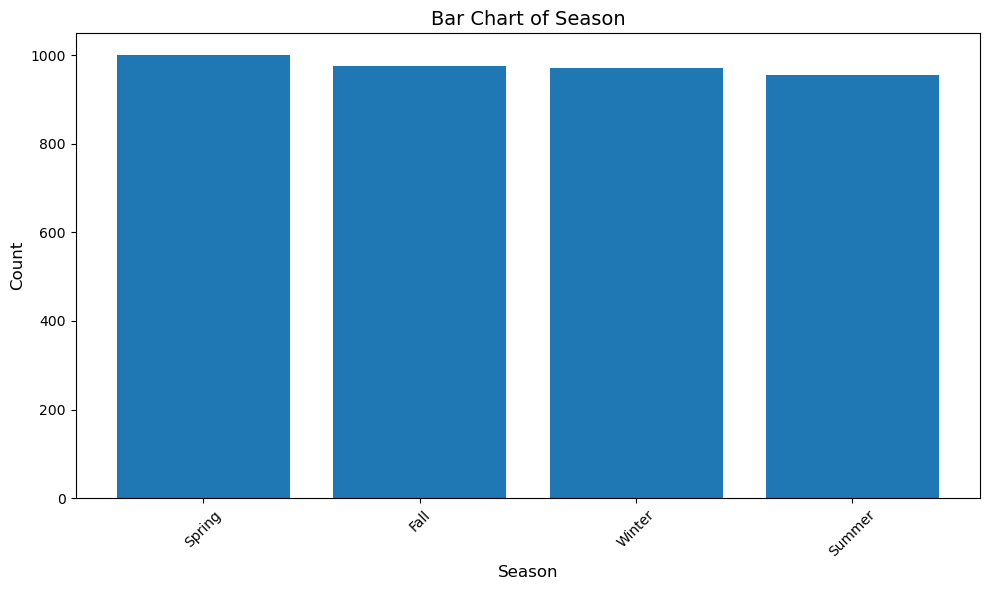

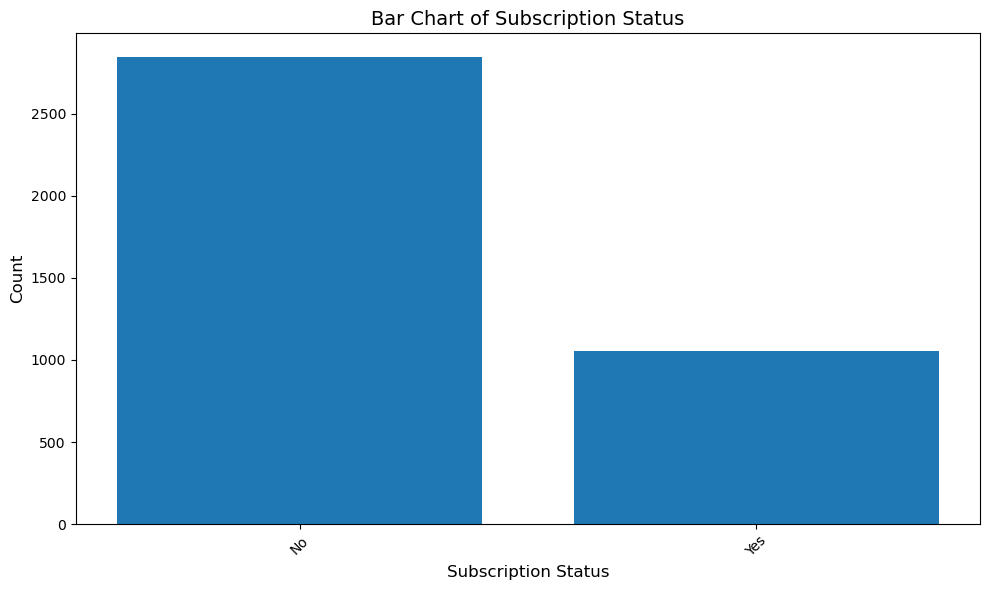

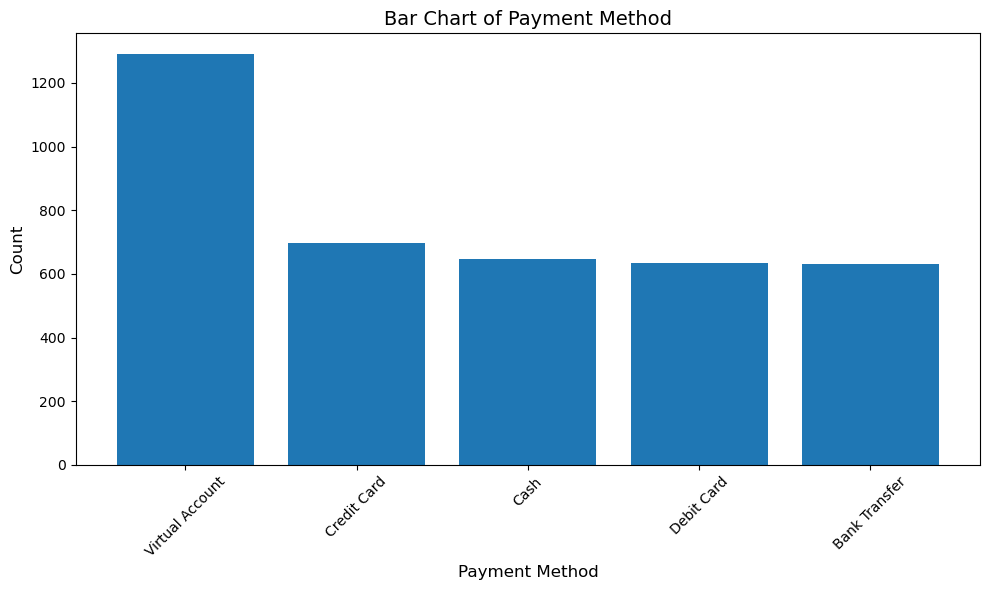

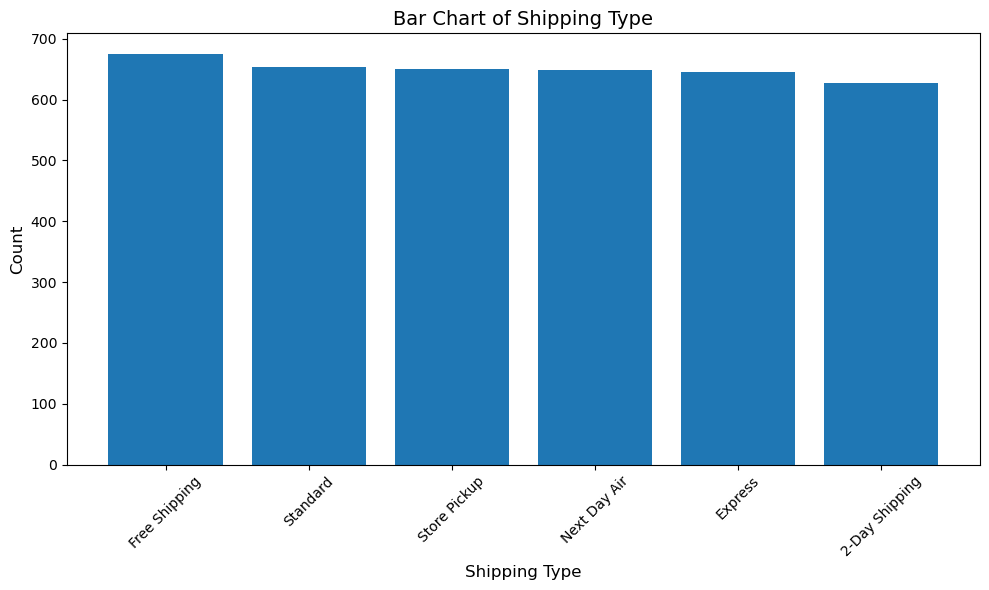

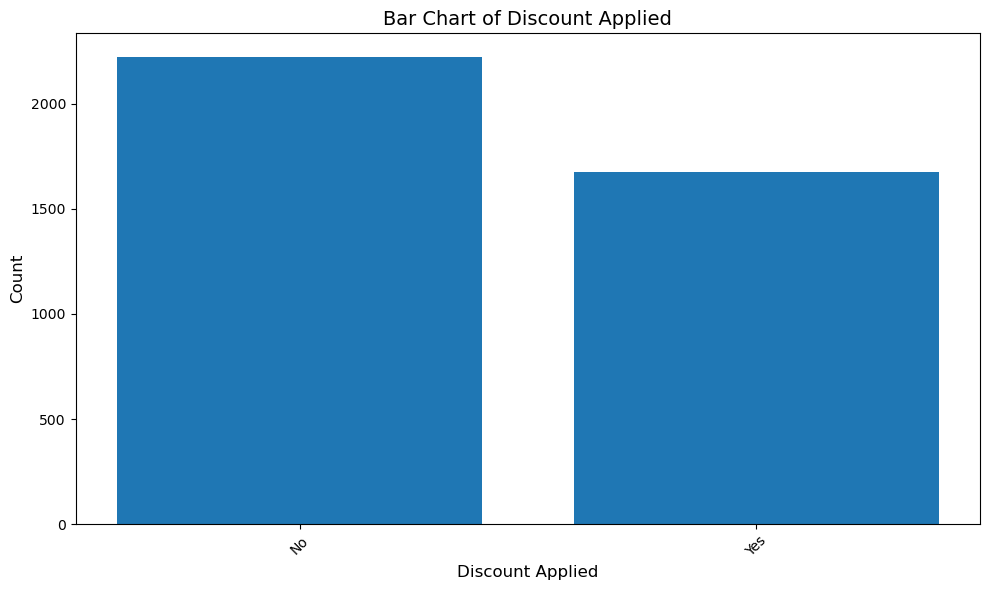

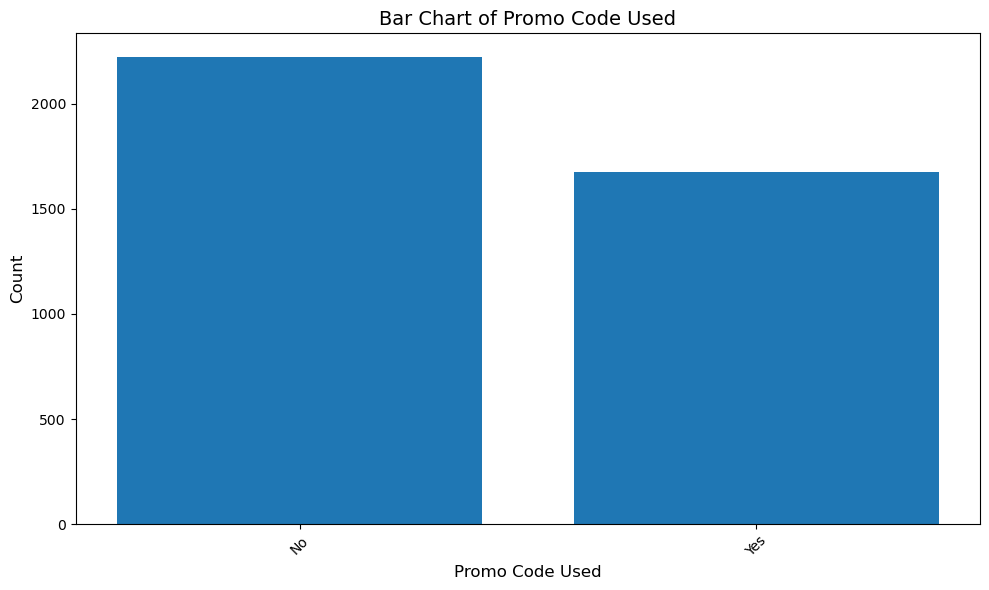

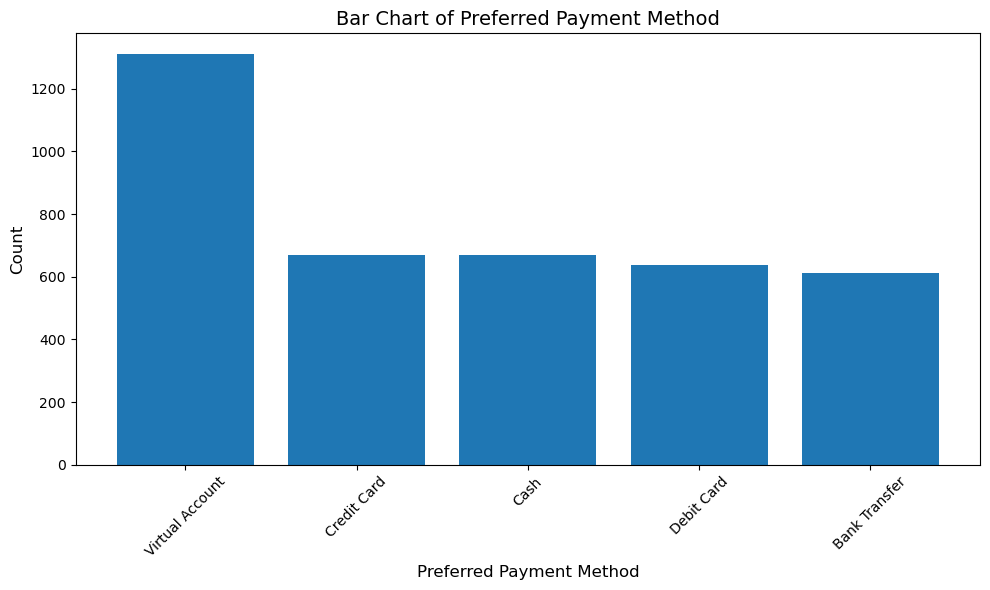

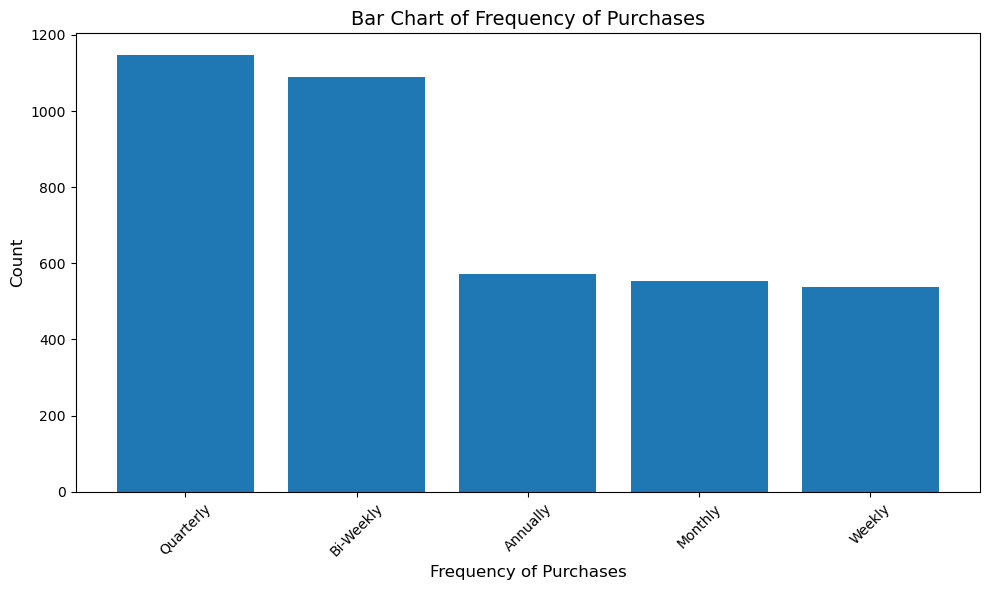

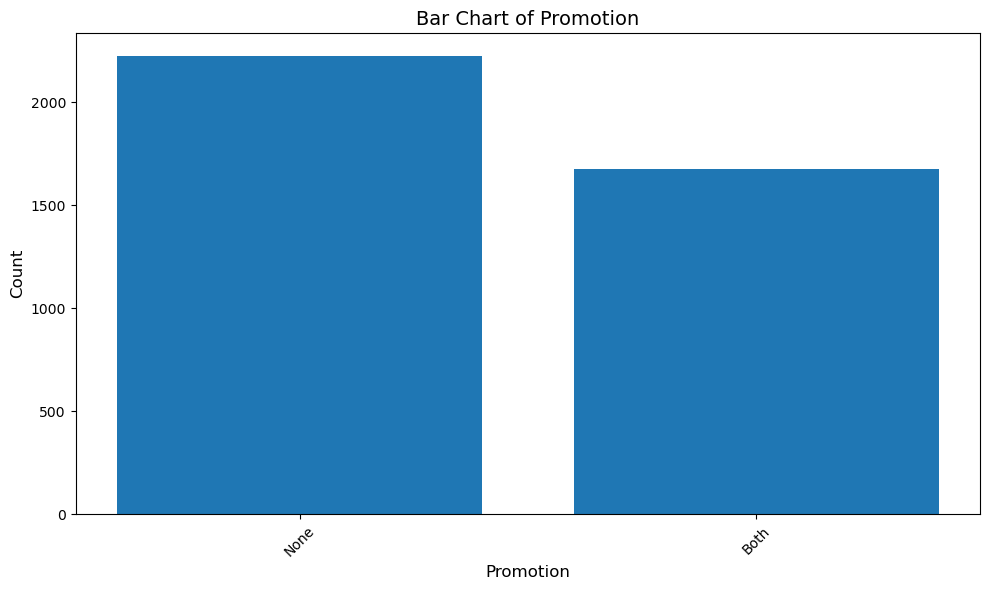

In [18]:
categorical_data = datasets.select_dtypes(exclude=[np.number])

def plot_ordinal(data):
    # Looping per kolom
    for column in data.columns:
        # Menghitung frekuensi dari setiap nilai unik di kolom ordinal
        value_counts = data[column].value_counts().reset_index()
        value_counts.columns = ['value', 'count']

        # Membuat Bar Chart dengan warna berbeda untuk setiap bar menggunakan matplotlib
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts['value'], value_counts['count'])
        plt.title(f'Bar Chart of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Menampilkan grafik
        plt.show()
plot_ordinal(categorical_data)

seeing the promotion chart this can concludes two things:
1. promo code is the one that applying the discount
2. 1500++ person is using both discount and promo
cause the first condition is likely happening because what are the odds 1500++ person doing the same thing. I dont say it impossible but number 1 condition is more logical to accept. so lets drop discount and promo and change Both into Promo and Discount Applied in Promotion column

In [19]:
datasets['Promotion'] = datasets['Promotion'].replace('Both', 'Promo Code & Discount')
datasets = datasets.drop(columns=['Discount Applied', 'Promo Code Used'])
datasets

,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age,Promotion
0,Male,Blouse,Clothing,53,L,Winter,3.1,Yes,Credit Card,Express,14,Virtual Account,Bi-Weekly,55,Promo Code & Discount
1,Male,Sweater,Clothing,64,L,Winter,3.1,Yes,Bank Transfer,Express,2,Cash,Bi-Weekly,19,Promo Code & Discount
2,Male,Jeans,Clothing,73,S,Spring,3.1,Yes,Cash,Free Shipping,23,Credit Card,Weekly,50,Promo Code & Discount
3,Male,Sandals,Footwear,90,M,Spring,3.5,Yes,Virtual Account,Next Day Air,49,Virtual Account,Weekly,21,Promo Code & Discount
4,Male,Blouse,Clothing,49,M,Spring,2.7,Yes,Cash,Free Shipping,31,Virtual Account,Annually,45,Promo Code & Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,28,L,Summer,4.2,No,Cash,2-Day Shipping,32,Virtual Account,Weekly,40,None
3896,Female,Backpack,Accessories,49,L,Spring,4.5,No,Virtual Account,Store Pickup,41,Bank Transfer,Bi-Weekly,52,None
3897,Female,Belt,Accessories,33,L,Spring,2.9,No,Credit Card,Standard,24,Virtual Account,Quarterly,46,None
3898,Female,Shoes,Footwear,77,S,Summer,3.8,No,Virtual Account,Express,24,Virtual Account,Weekly,44,None


# EDA CONCLUSION

- Duplicates and Null Values:
The dataset is very clean in terms of duplicates and null values. Additionally, the distribution of the data and the handling of outliers are excellent compared to other similar datasets.
- Corrections Needed:
1. Gender: There are typos in the gender column where "f" and "M" need to be corrected to Female and Male, respectively.
2. Birth Date: Transform the birth date column into an Age column, as it would be more practical and useful for analysis.
- Categorical Data Issues:
1. Promo and Discount: These columns can be merged into a single column named Promotion since they essentially represent the same concept.
2. Frequency: Standardize values where Bi-Weekly = Fortnightly and Quarterly = Every 3 Months, as they are equivalent.
= Payment Methods:
To simplify, Venmo and PayPal will be grouped into a single category called Virtual Account in both the preferred payment methods and payment methods columns.
= Column Removal:
1. Customer ID: As it’s an identifier column, it doesn’t add value to the analysis.
2. Colors and Location: These columns are less impactful for determining the type of product promotions. Removing them also reduces dimensionality, making it easier for machine learning models like K-means to process the data effectively.


### Step 3 : Preprocessing Data

a. Numerical

In [20]:
numeric_data

,Purchase Amount (USD),Review Rating,Previous Purchases,Age
0,53,3.1,14,55
1,64,3.1,2,19
2,73,3.1,23,50
3,90,3.5,49,21
4,49,2.7,31,45
...,...,...,...,...
3895,28,4.2,32,40
3896,49,4.5,41,52
3897,33,2.9,24,46
3898,77,3.8,24,44


untuk numerical kita akan pakai robust untuk semua numeric karena distribusi normal dan tidak ada outlier.

In [21]:
standard = StandardScaler()


datasets['Age'] = standard.fit_transform(datasets[['Age']])  
datasets['Purchase Amount (USD)'] = standard.fit_transform(datasets[['Purchase Amount (USD)']])  
datasets['Review Rating'] = standard.fit_transform(datasets[['Review Rating']])  
datasets['Previous Purchases'] = standard.fit_transform(datasets[['Previous Purchases']])  
datasets

,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age,Promotion
0,Male,Blouse,Clothing,-0.285629,L,Winter,-0.907584,Yes,Credit Card,Express,-0.785831,Virtual Account,Bi-Weekly,0.713327,Promo Code & Discount
1,Male,Sweater,Clothing,0.178852,L,Winter,-0.907584,Yes,Bank Transfer,Express,-1.616552,Cash,Bi-Weekly,-1.652130,Promo Code & Discount
2,Male,Jeans,Clothing,0.558882,S,Spring,-0.907584,Yes,Cash,Free Shipping,-0.162789,Credit Card,Weekly,0.384791,Promo Code & Discount
3,Male,Sandals,Footwear,1.276716,M,Spring,-0.349027,Yes,Virtual Account,Next Day Air,1.637107,Virtual Account,Weekly,-1.520715,Promo Code & Discount
4,Male,Blouse,Clothing,-0.454531,M,Spring,-1.466141,Yes,Cash,Free Shipping,0.391025,Virtual Account,Annually,0.056255,Promo Code & Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,-1.341267,L,Summer,0.628448,No,Cash,2-Day Shipping,0.460252,Virtual Account,Weekly,-0.272280,None
3896,Female,Backpack,Accessories,-0.454531,L,Spring,1.047366,No,Virtual Account,Store Pickup,1.083293,Bank Transfer,Bi-Weekly,0.516205,None
3897,Female,Belt,Accessories,-1.130139,L,Spring,-1.186862,No,Credit Card,Standard,-0.093563,Virtual Account,Quarterly,0.121963,None
3898,Female,Shoes,Footwear,0.727784,S,Summer,0.069891,No,Virtual Account,Express,-0.093563,Virtual Account,Weekly,-0.009452,None


b. Categorical

In [22]:
categorical_data = datasets.select_dtypes(exclude=[np.number])
categorical_data

,Gender,Item Purchased,Category,Size,Season,Subscription Status,Payment Method,Shipping Type,Preferred Payment Method,Frequency of Purchases,Promotion
0,Male,Blouse,Clothing,L,Winter,Yes,Credit Card,Express,Virtual Account,Bi-Weekly,Promo Code & Discount
1,Male,Sweater,Clothing,L,Winter,Yes,Bank Transfer,Express,Cash,Bi-Weekly,Promo Code & Discount
2,Male,Jeans,Clothing,S,Spring,Yes,Cash,Free Shipping,Credit Card,Weekly,Promo Code & Discount
3,Male,Sandals,Footwear,M,Spring,Yes,Virtual Account,Next Day Air,Virtual Account,Weekly,Promo Code & Discount
4,Male,Blouse,Clothing,M,Spring,Yes,Cash,Free Shipping,Virtual Account,Annually,Promo Code & Discount
...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,L,Summer,No,Cash,2-Day Shipping,Virtual Account,Weekly,None
3896,Female,Backpack,Accessories,L,Spring,No,Virtual Account,Store Pickup,Bank Transfer,Bi-Weekly,None
3897,Female,Belt,Accessories,L,Spring,No,Credit Card,Standard,Virtual Account,Quarterly,None
3898,Female,Shoes,Footwear,S,Summer,No,Virtual Account,Express,Virtual Account,Weekly,None


For categorical features, we will use:
- Label Encoder: For gender, subscription status, and promotion, we will use label encoding because their unique values in the data are only 2.
- One-Hot Encoder: For category, preferred payment method, and payment method, we will use one-hot encoding because these features do not have a hierarchical relationship with one another.
- Ordinal Encoder: For size, season, shipping type, and frequency of purchases. The size has a hierarchical relationship from S to M to L and XL, season reflects a time hierarchy of the seasons, shipping type is hierarchized by delivery speed, and frequency follows a similar hierarchy.

Here, I decided to drop the "Item Purchased" feature. First, if we were to encode it, it would take up a lot of space because in my opinion, it would be best suited for one-hot encoding since there is no hierarchy. That's why we'll drop it. Why? Because it’s essentially similar to the "Category" feature that already points to the right values. Even if there is promotion, we typically promote by section, for example, promotions for clothing, etc. So, I will drop "Item Purchased."

In [23]:
datasets.drop(["Item Purchased"], axis="columns", inplace=True)

In [24]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False) 

In [25]:
label_enc_columns = ['Gender', 'Subscription Status', 'Promotion']
label_encoders = {col: LabelEncoder() for col in label_enc_columns}

for col in label_enc_columns:
    datasets[col] = label_encoders[col].fit_transform(datasets[col])

one_hot_enc_columns = ['Category', 'Preferred Payment Method']
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), one_hot_enc_columns)
    ],
    remainder='passthrough'
)

transformed_data = one_hot_encoder.fit_transform(datasets)

new_column_names = [
    name.split('_')[-1] if '__' in name else name for name in one_hot_encoder.get_feature_names_out()
]

datasets = pd.DataFrame(transformed_data, columns=new_column_names)
datasets

ordinal_enc_columns = ['Size', 'Season', 'Shipping Type', 'Frequency of Purchases','Payment Method']
ordinal_categories = [
    ['S', 'M', 'L', 'XL'],  # dari kecil ke besar
    ['Spring', 'Summer', 'Fall', 'Winter'],  # dari musim awal sampai akhir ( januari - desember)
    ['Store Pickup','Free Shipping','Standard','2-Day Shipping', 'Next Day Air', 'Express'], #dari murah ke mahal
    ['Annually','Quarterly', 'Monthly','Bi-Weekly', 'Weekly'], # dari jarang ke sering
    ['Cash','Virtual Account','Bank Transfer', 'Debit Card', 'Credit Card'] # from traditional to modern
]

ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
datasets[ordinal_enc_columns] = ordinal_encoder.fit_transform(datasets[ordinal_enc_columns])


In [26]:
datasets

,Accessories,Clothing,Footwear,Outerwear,Bank Transfer,Cash,Credit Card,Debit Card,Virtual Account,Gender,...,Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Previous Purchases,Frequency of Purchases,Age,Promotion
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,2.0,3.0,-0.907584,1,4.0,5.0,-0.785831,3.0,0.713327,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,2.0,3.0,-0.907584,1,2.0,5.0,-1.616552,3.0,-1.65213,1
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0.0,0.0,-0.907584,1,0.0,1.0,-0.162789,4.0,0.384791,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,1.0,0.0,-0.349027,1,1.0,4.0,1.637107,4.0,-1.520715,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,1.0,0.0,-1.466141,1,0.0,1.0,0.391025,0.0,0.056255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,2.0,1.0,0.628448,0,0.0,3.0,0.460252,4.0,-0.27228,0
3896,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,2.0,0.0,1.047366,0,1.0,0.0,1.083293,3.0,0.516205,0
3897,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,2.0,0.0,-1.186862,0,4.0,2.0,-0.093563,1.0,0.121963,0
3898,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,1.0,0.069891,0,1.0,5.0,-0.093563,4.0,-0.009452,0


In [27]:
datasets
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accessories             3900 non-null   object 
 1   Clothing                3900 non-null   object 
 2   Footwear                3900 non-null   object 
 3   Outerwear               3900 non-null   object 
 4   Bank Transfer           3900 non-null   object 
 5   Cash                    3900 non-null   object 
 6   Credit Card             3900 non-null   object 
 7   Debit Card              3900 non-null   object 
 8   Virtual Account         3900 non-null   object 
 9   Gender                  3900 non-null   object 
 10  Purchase Amount (USD)   3900 non-null   object 
 11  Size                    3900 non-null   float64
 12  Season                  3900 non-null   float64
 13  Review Rating           3900 non-null   object 
 14  Subscription Status     3900 non-null   

# Dimensionality Reduction

In [28]:
pca = PCA()
pca.fit(datasets)

PCA()

Text(0, 0.5, 'Eigenvalues')

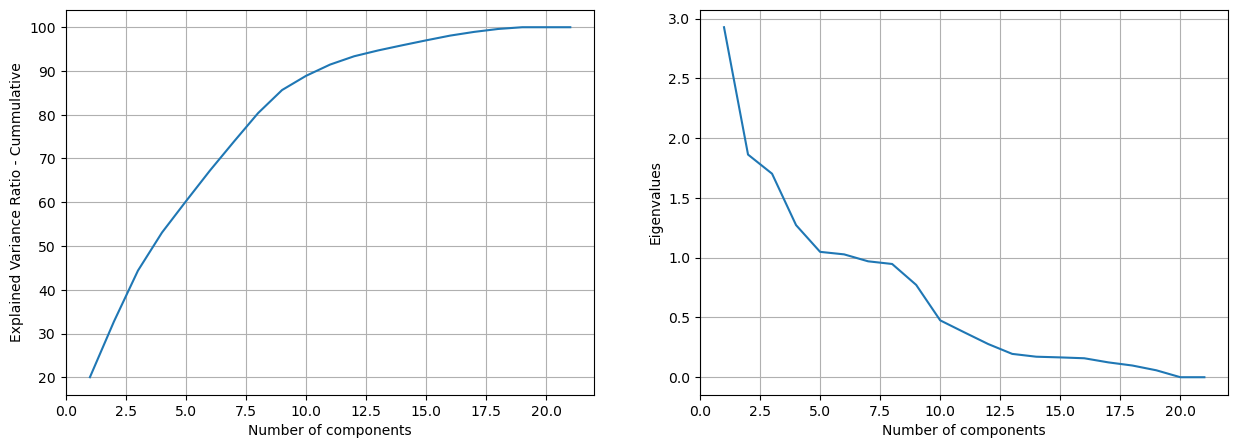

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(datasets.columns)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(datasets.columns)+1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [30]:
pca_comp = PCA(n_components=2)

datasets_pca = pca_comp.fit_transform(datasets)

Reducing the dimensions from 3 to 2 is done to make the data easier to understand and analyze. With 2 dimensions, we can see the data more clearly through visualizations like scatter plots, which makes it easier to observe the differences between clusters. This also makes the analysis simpler and faster, as there are no additional dimensions to confuse the interpretation. Moreover, if a third dimension is very similar to others, reducing it can prevent the data from becoming repetitive. Techniques like PCA ensure that important information is preserved even when the data is narrowed down. So, this dimension reduction helps us understand the data better without losing important information. Honestly, this has been proven, sir. I initially used 3 dimensions, but once I reduced it to 2, the patterns became much clearer.

### Step 3: Clustering

In [31]:
distortions = []
silhouettes = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=SEED)
    cluster_label=kmeanModel.fit_predict(datasets_pca)
    #calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(datasets_pca, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    distortions.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3158940063044286
For n_clusters = 3 The average silhouette_score is : 0.41239826428542214
For n_clusters = 4 The average silhouette_score is : 0.4368780732598114
For n_clusters = 5 The average silhouette_score is : 0.43346470488773187
For n_clusters = 6 The average silhouette_score is : 0.4366325692797677
For n_clusters = 7 The average silhouette_score is : 0.40408359833096485
For n_clusters = 8 The average silhouette_score is : 0.40668852386689514
For n_clusters = 9 The average silhouette_score is : 0.39198603570916235


Here, the average silhouette score is highest at n = 6, with a value around 0.46. This explains that having too many clusters can actually degrade the pattern, which was already good, especially when considering the unique values from the columns themselves. Having 6 clusters results in a good silhouette score for n = 6.

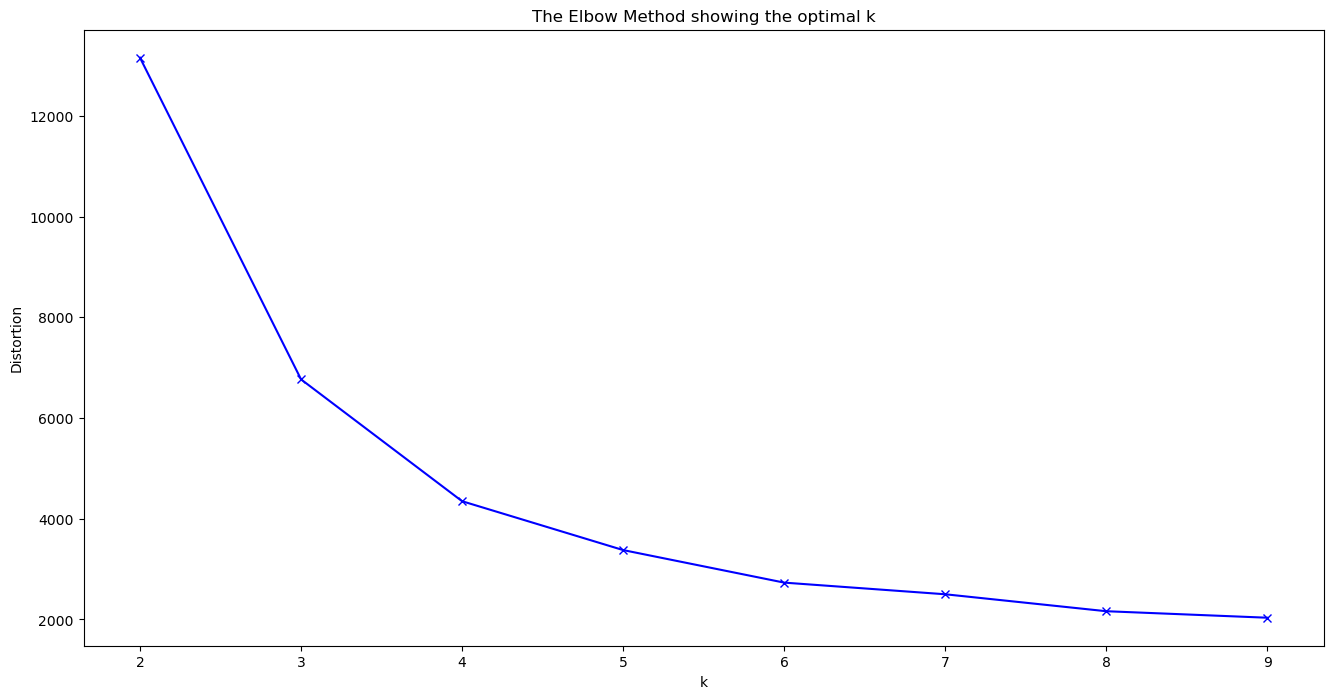

In [32]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3158940063044286
For n_clusters = 3 The average silhouette_score is : 0.41239826428542214
For n_clusters = 4 The average silhouette_score is : 0.4368780732598114
For n_clusters = 5 The average silhouette_score is : 0.43346470488773187
For n_clusters = 6 The average silhouette_score is : 0.4366325692797677
For n_clusters = 7 The average silhouette_score is : 0.40408359833096485
For n_clusters = 8 The average silhouette_score is : 0.40668852386689514
For n_clusters = 9 The average silhouette_score is : 0.39198603570916235


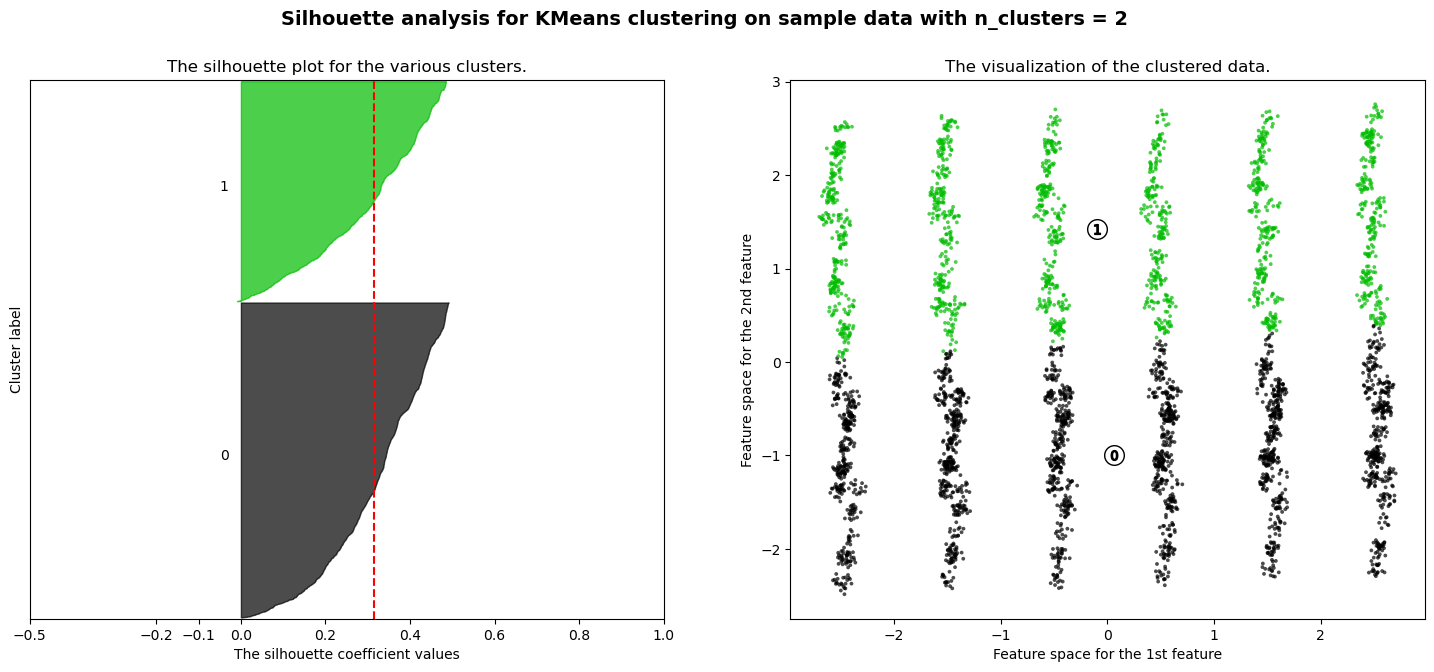

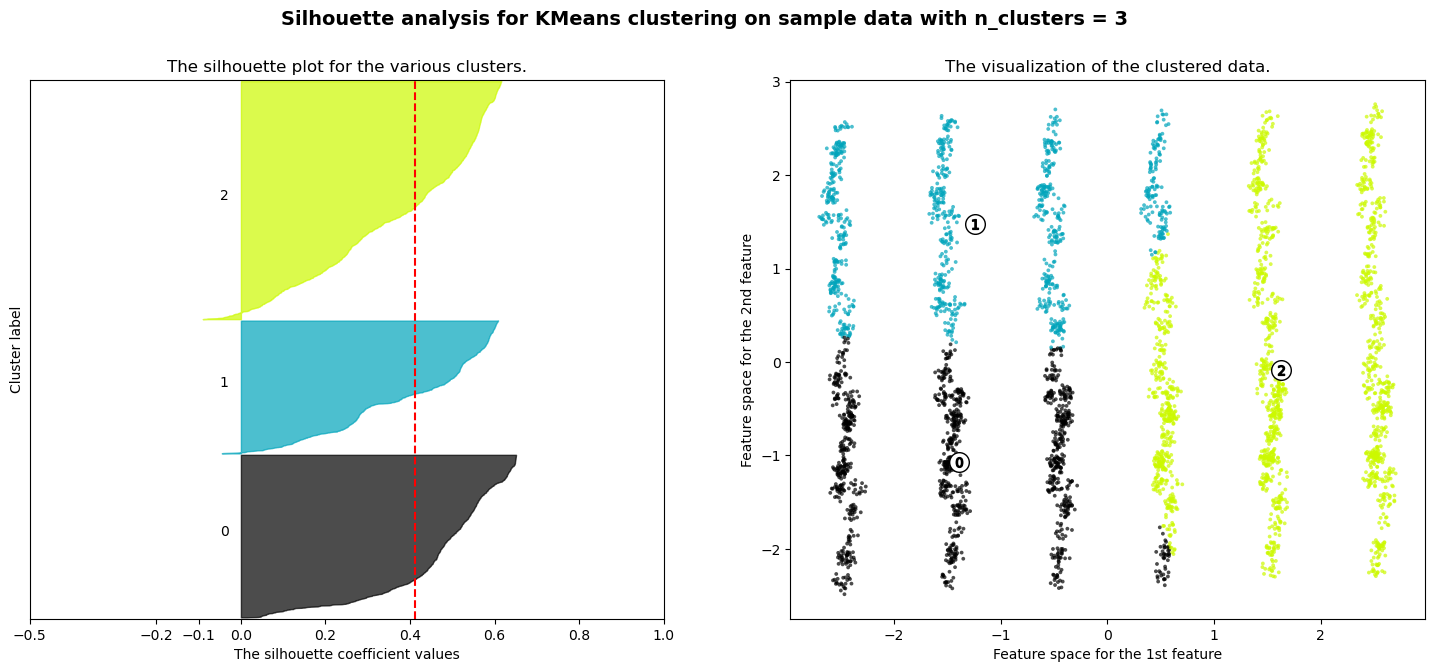

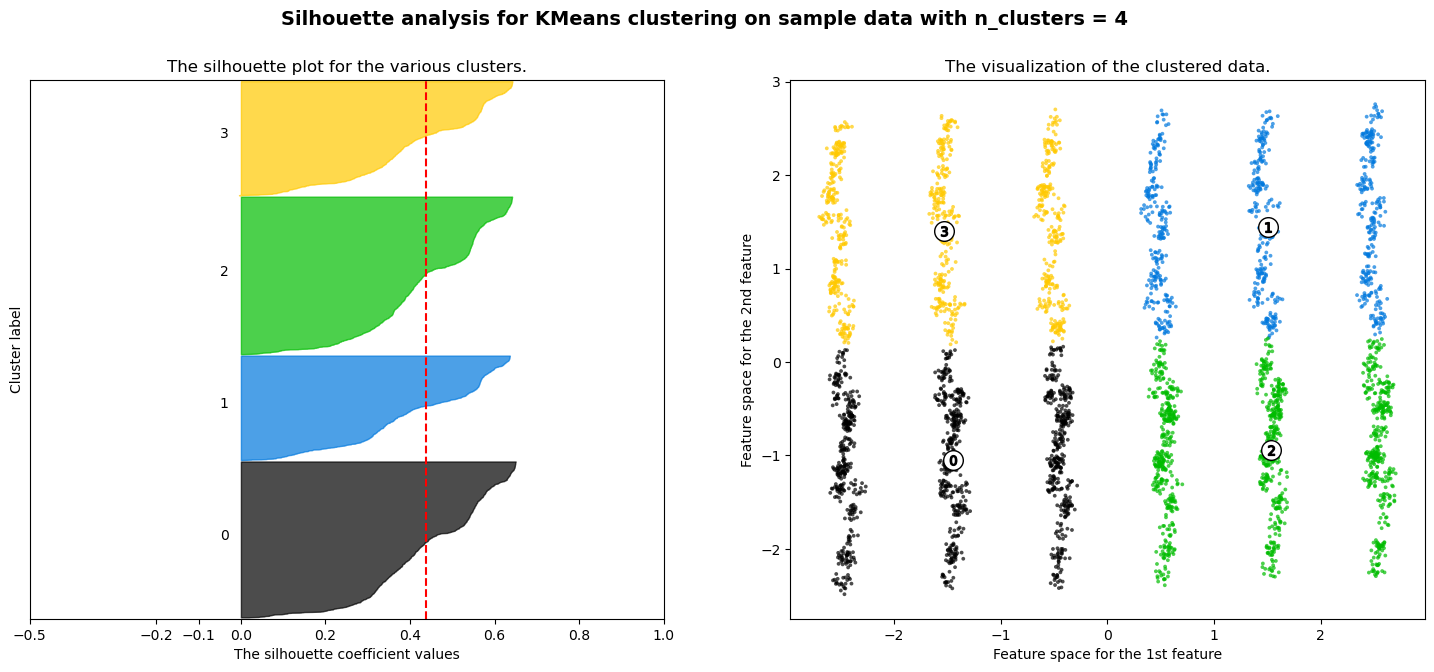

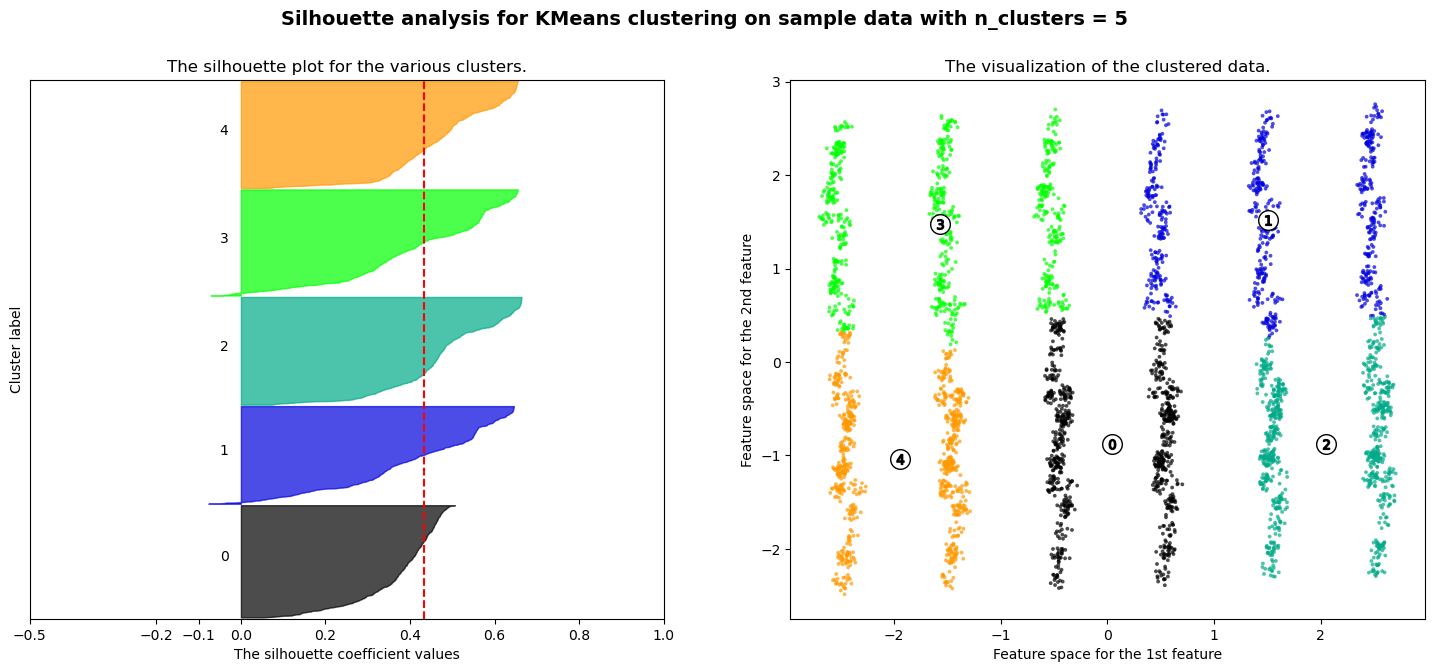

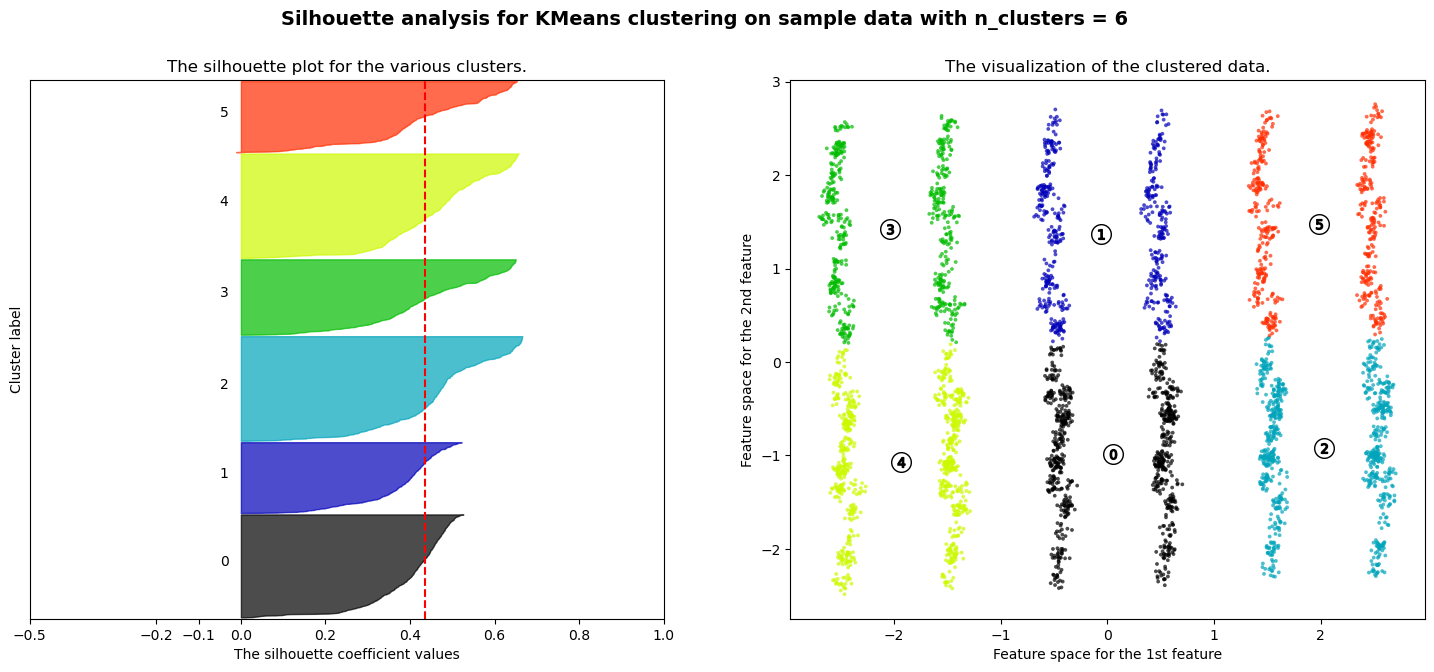

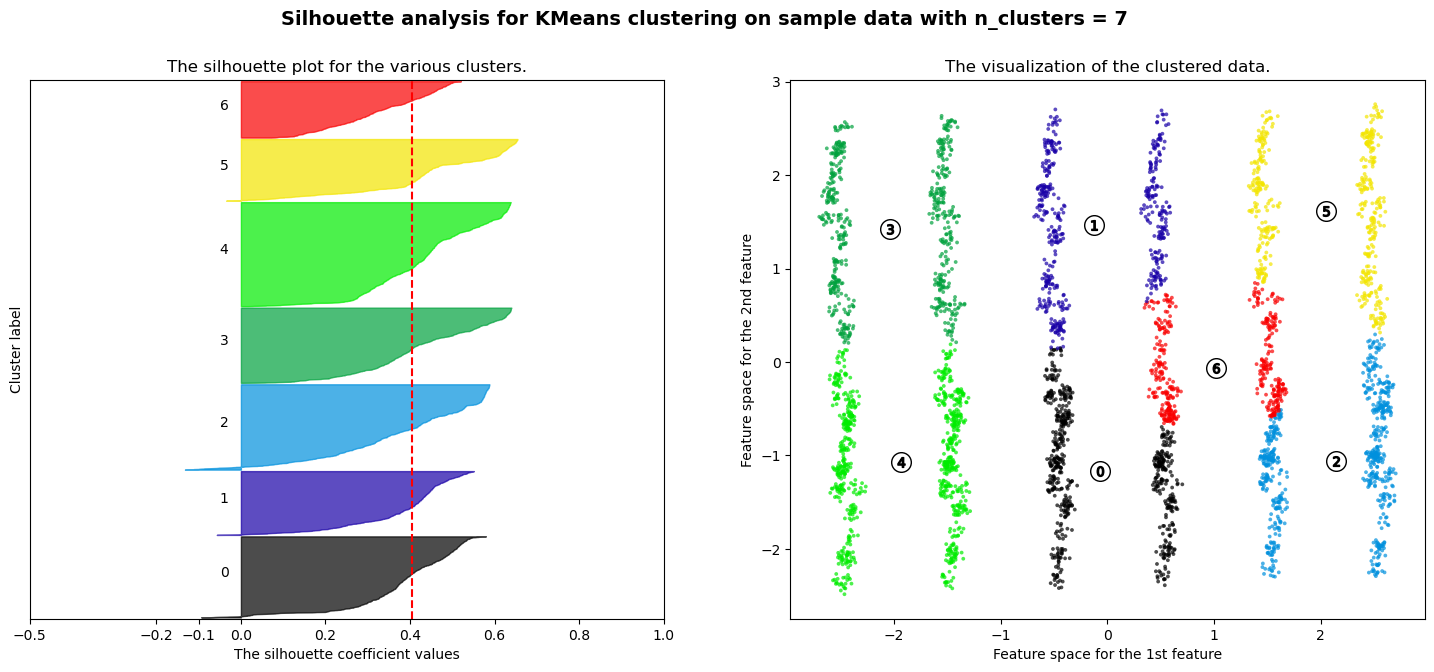

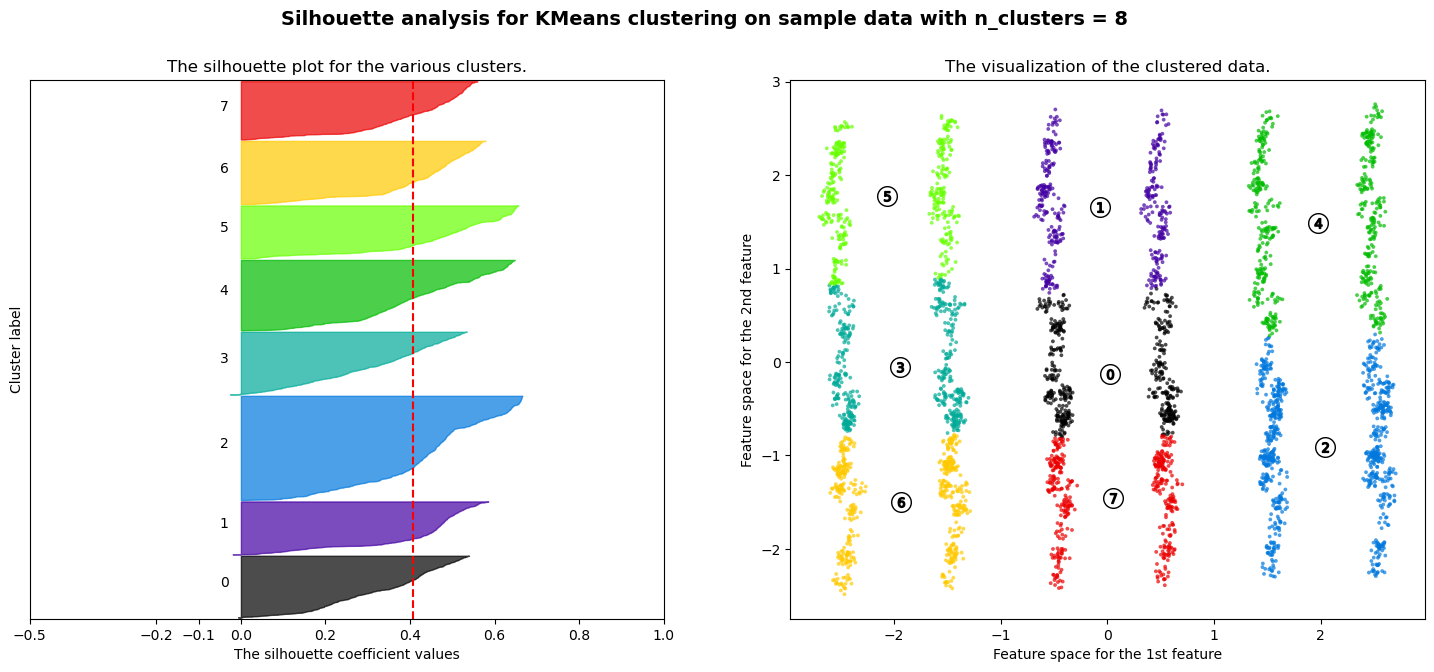

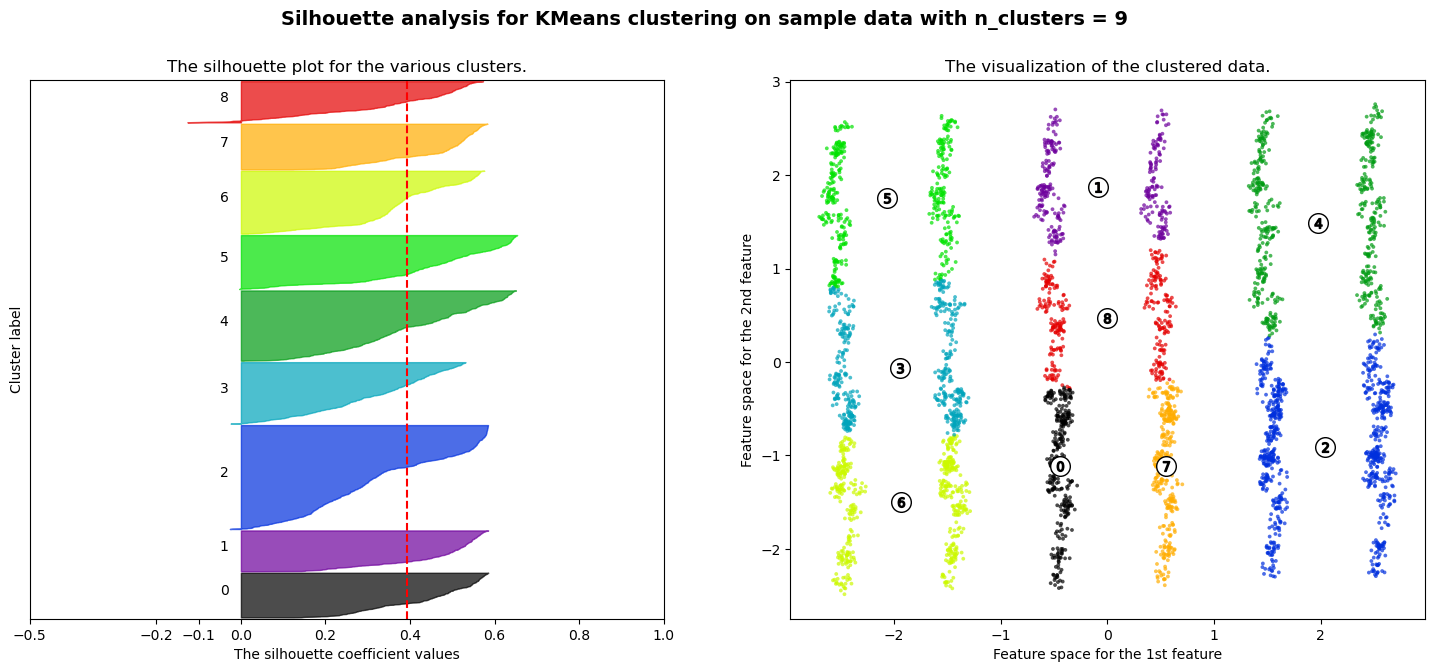

In [33]:
for n_clusters in K:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(datasets_pca) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = clusterer.fit_predict(datasets_pca)
    silhouette_avg = silhouette_score(datasets_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(datasets_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.5,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    pca_comp = PCA(n_components=2)
    df_pca_2 = pca_comp.fit_transform(datasets_pca)

    ax2.scatter(
        df_pca_2[:, 0], df_pca_2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
  
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [34]:
datasets['Cluster'] = KMeans(n_clusters=3, random_state=SEED).fit_predict(datasets_pca)
datasets

,Accessories,Clothing,Footwear,Outerwear,Bank Transfer,Cash,Credit Card,Debit Card,Virtual Account,Gender,...,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Previous Purchases,Frequency of Purchases,Age,Promotion,Cluster
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,3.0,-0.907584,1,4.0,5.0,-0.785831,3.0,0.713327,1,2
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,3.0,-0.907584,1,2.0,5.0,-1.616552,3.0,-1.65213,1,2
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0.0,-0.907584,1,0.0,1.0,-0.162789,4.0,0.384791,1,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0.0,-0.349027,1,1.0,4.0,1.637107,4.0,-1.520715,1,2
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0.0,-1.466141,1,0.0,1.0,0.391025,0.0,0.056255,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,1.0,0.628448,0,0.0,3.0,0.460252,4.0,-0.27228,0,2
3896,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.0,1.047366,0,1.0,0.0,1.083293,3.0,0.516205,0,0
3897,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,-1.186862,0,4.0,2.0,-0.093563,1.0,0.121963,0,1
3898,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,1.0,0.069891,0,1.0,5.0,-0.093563,4.0,-0.009452,0,2


In [35]:
datasets

,Accessories,Clothing,Footwear,Outerwear,Bank Transfer,Cash,Credit Card,Debit Card,Virtual Account,Gender,...,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Previous Purchases,Frequency of Purchases,Age,Promotion,Cluster
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,3.0,-0.907584,1,4.0,5.0,-0.785831,3.0,0.713327,1,2
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,3.0,-0.907584,1,2.0,5.0,-1.616552,3.0,-1.65213,1,2
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0.0,-0.907584,1,0.0,1.0,-0.162789,4.0,0.384791,1,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0.0,-0.349027,1,1.0,4.0,1.637107,4.0,-1.520715,1,2
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0.0,-1.466141,1,0.0,1.0,0.391025,0.0,0.056255,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,1.0,0.628448,0,0.0,3.0,0.460252,4.0,-0.27228,0,2
3896,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.0,1.047366,0,1.0,0.0,1.083293,3.0,0.516205,0,0
3897,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0.0,-1.186862,0,4.0,2.0,-0.093563,1.0,0.121963,0,1
3898,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,1.0,0.069891,0,1.0,5.0,-0.093563,4.0,-0.009452,0,2


In [36]:
categorical_data = datasets.select_dtypes(exclude=[np.number])
numeric_data = categorical_data[["Purchase Amount (USD)", "Review Rating", "Previous Purchases", "Age"]]
categorical_data.drop(["Purchase Amount (USD)", "Review Rating", "Previous Purchases", "Age"], axis="columns", inplace=True)

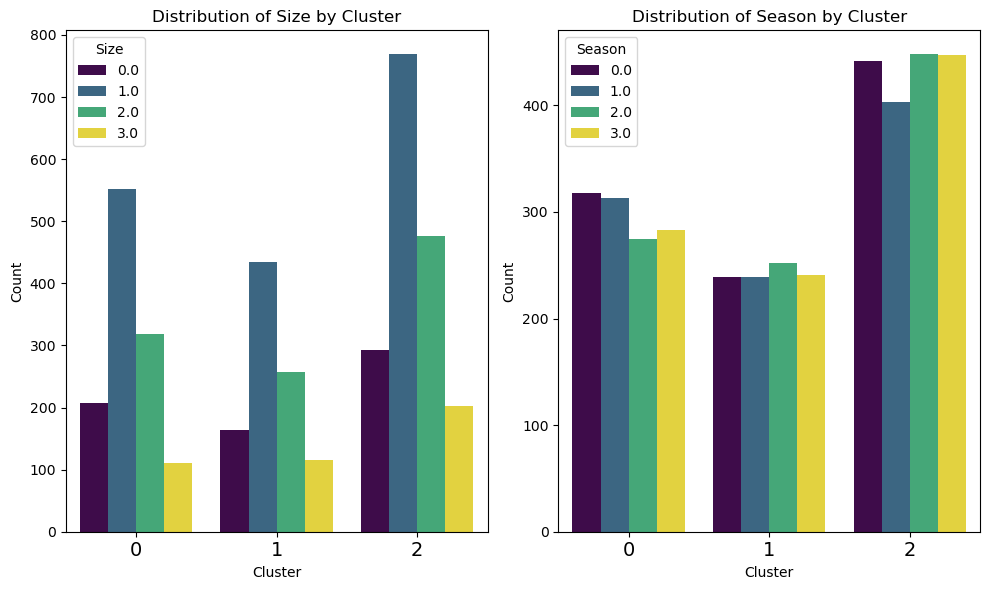

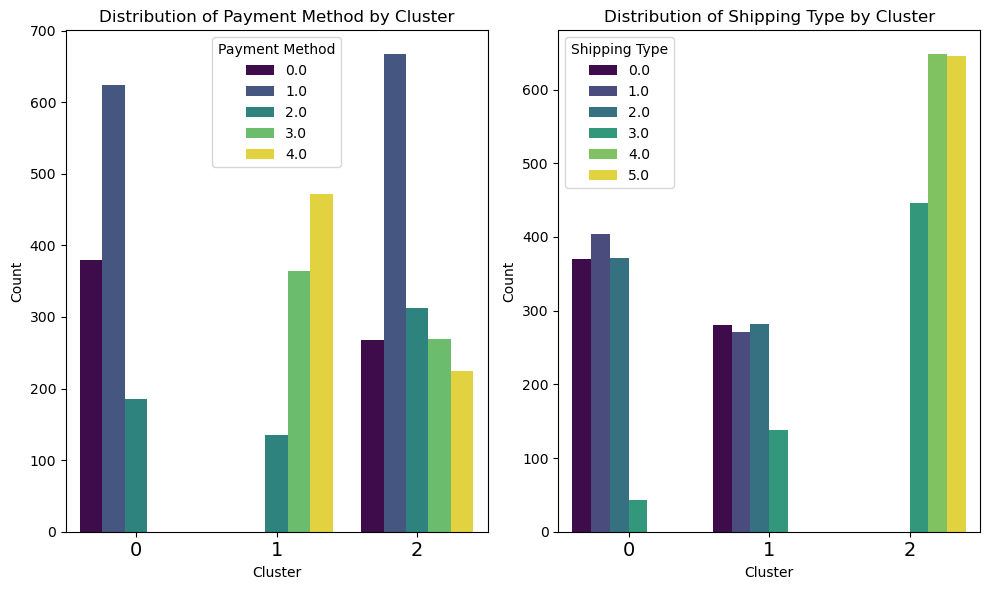

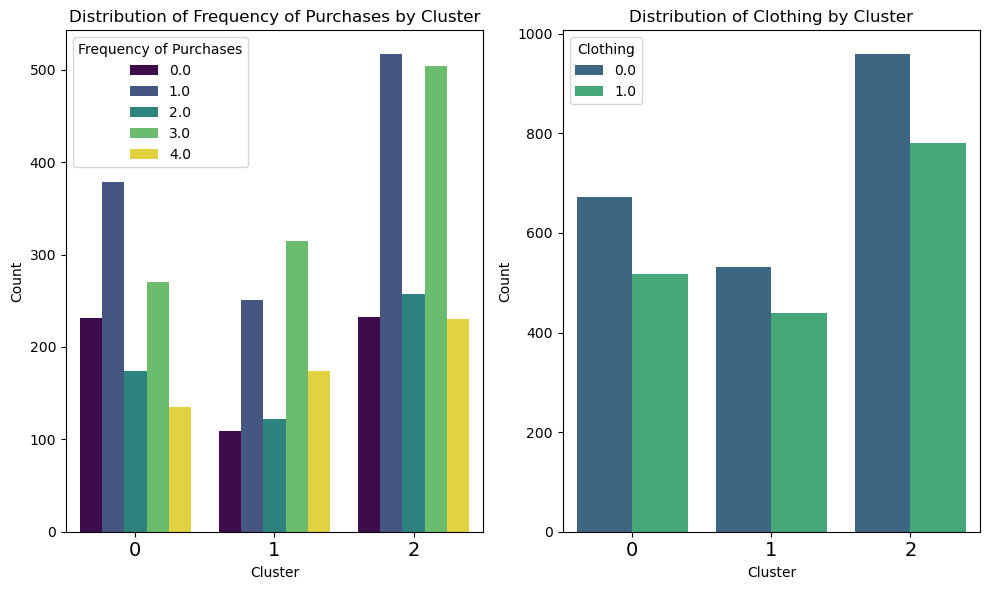

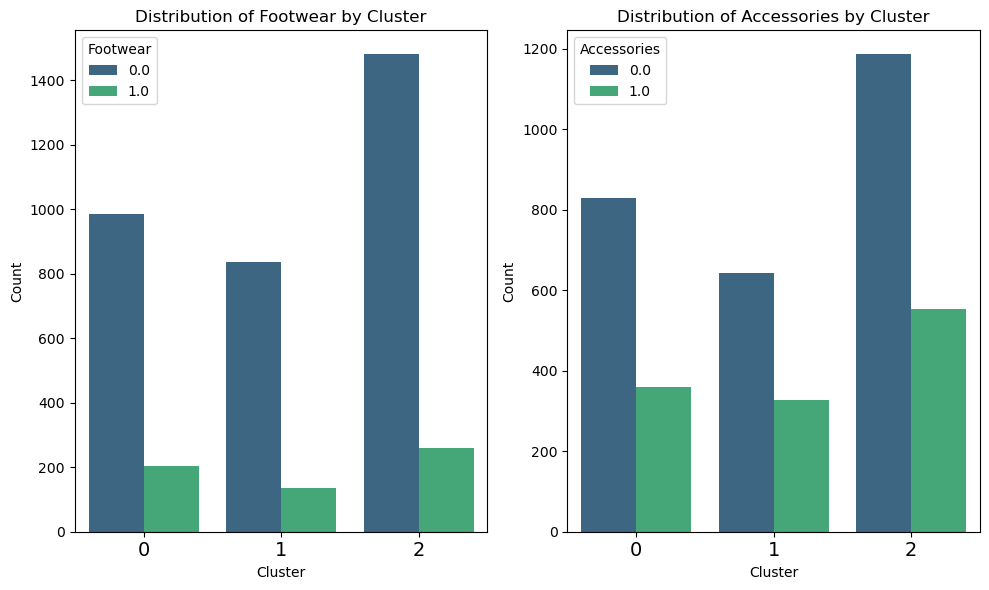

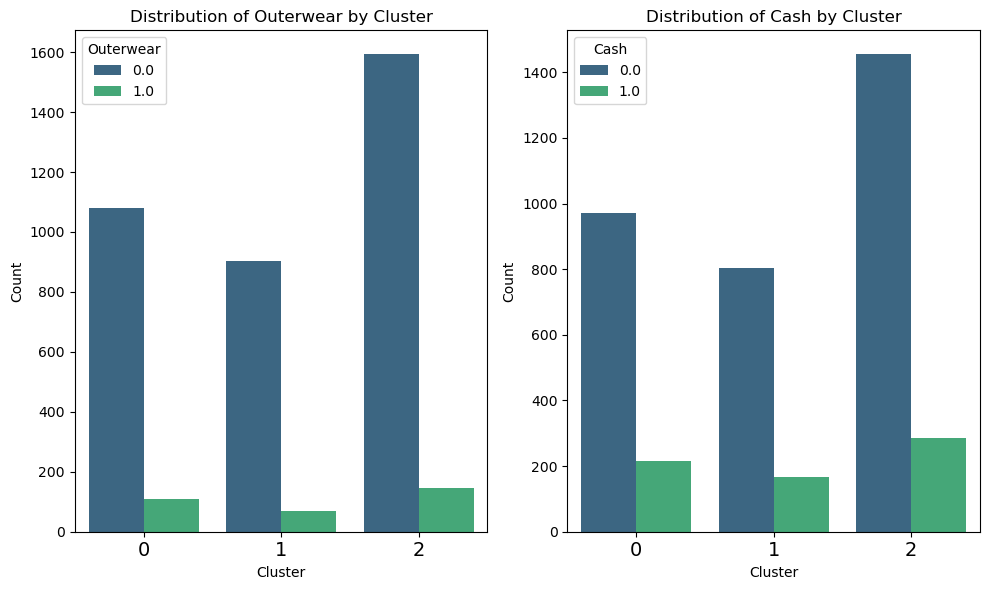

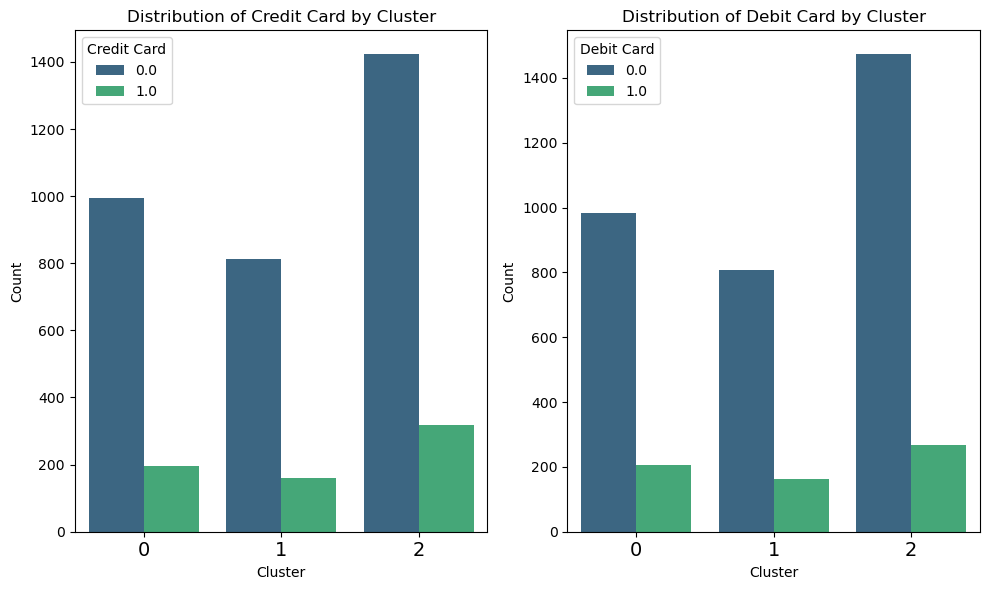

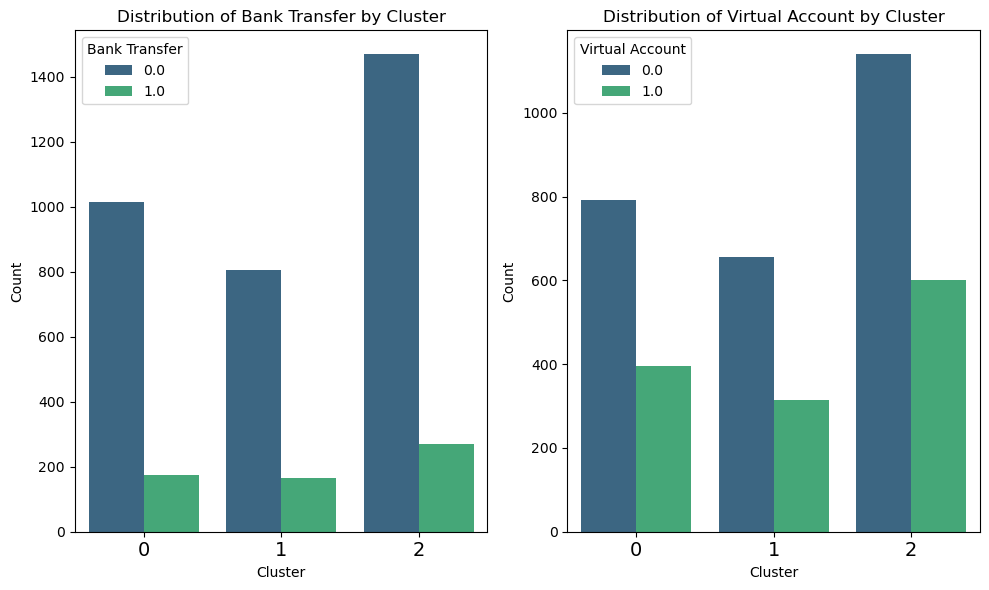

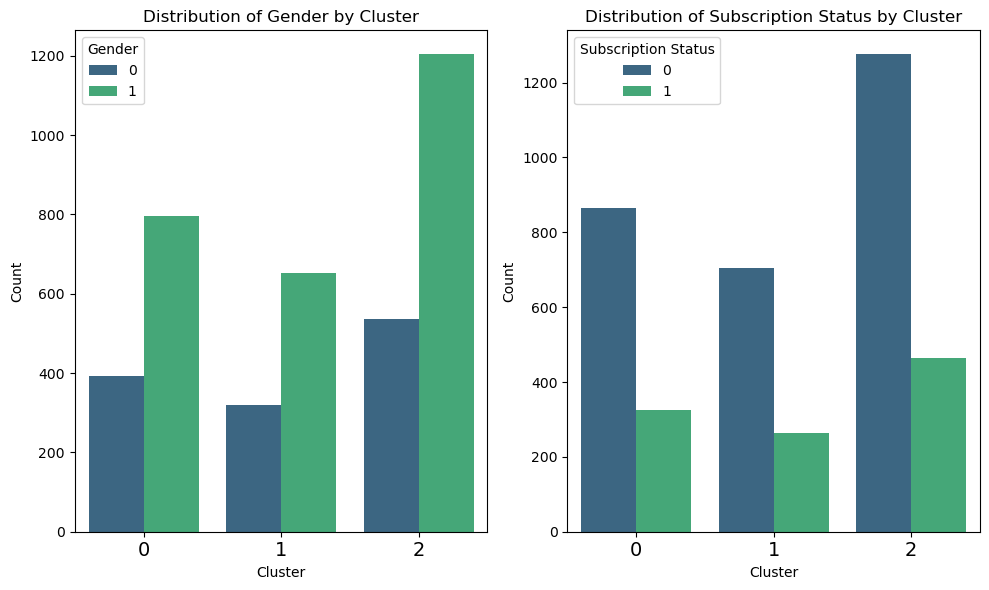

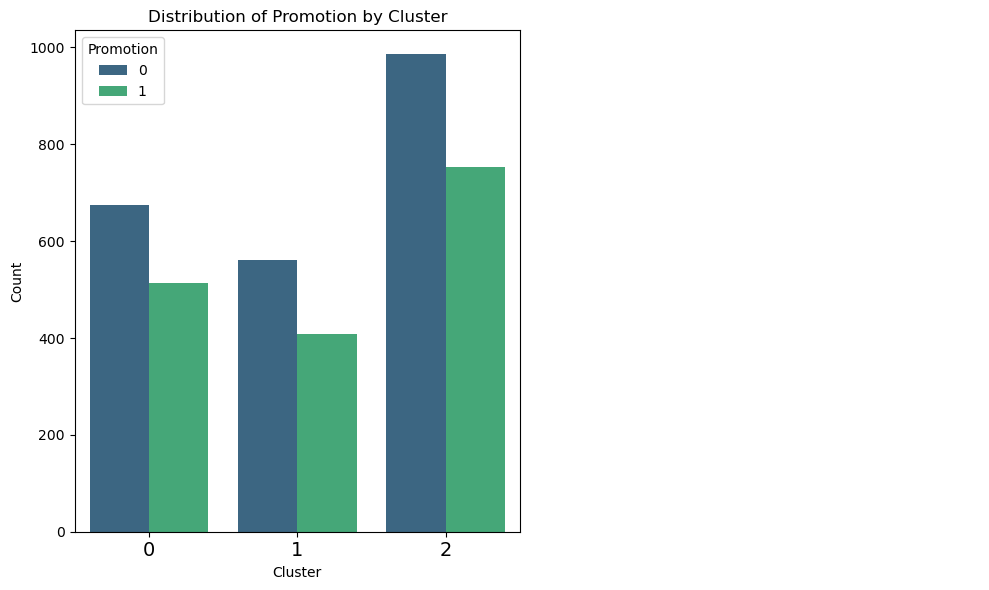

In [40]:
import math
# Tentukan jumlah kolom per gambar (misalnya 2 kolom per gambar)
categorical_data = ['Size','Season','Payment Method','Shipping Type','Frequency of Purchases','Clothing', 'Footwear', 'Accessories','Outerwear', 'Cash', 'Credit Card', 'Debit Card','Bank Transfer', 'Virtual Account', 'Gender', 'Subscription Status', 'Promotion']

# Tentukan jumlah kolom per gambar (misalnya 2 kolom per gambar)
n_cols = 2

# Hitung jumlah gambar yang dibutuhkan berdasarkan jumlah kolom yang ada
n_images = math.ceil(len(categorical_data) / n_cols)

# Loop untuk membuat gambar terpisah
for img_num in range(n_images):
    start_idx = img_num * n_cols
    end_idx = min((img_num + 1) * n_cols, len(categorical_data))
    
    # Menentukan jumlah subplot untuk gambar ini
    n_rows = math.ceil((end_idx - start_idx) / n_cols)
    
    # Membuat gambar untuk setiap kelompok subplot
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6 * n_rows))
    
    # Jika hanya ada satu baris atau satu kolom, `axes` akan berbentuk array 1D atau 2D,
    # jadi kita perlu meratakannya menjadi array 1D untuk mempermudah pengaksesan.
    axes = axes.flatten()

    # Loop untuk setiap kolom yang akan diproses
    for i, col in enumerate(categorical_data[start_idx:end_idx]):
        if i < len(axes):  # Pastikan kita tidak mengakses subplot yang tidak ada
            cluster_counts = datasets.groupby(['Cluster', col]).size().reset_index(name='Count')
            sns.barplot(x='Cluster', y='Count', hue=col, data=cluster_counts, ax=axes[i], palette='viridis')
            axes[i].set_title(f"Distribution of {col} by Cluster")
            axes[i].tick_params(axis='x', labelsize=14, rotation=0)

    # Sembunyikan subplot yang tidak digunakan jika ada
    for j in range(len(categorical_data[start_idx:end_idx]), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_98146/3646077509.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=datasets, ax=axes[i], palette='viridis')
/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_98146/3646077509.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=datasets, ax=axes[i], palette='viridis')


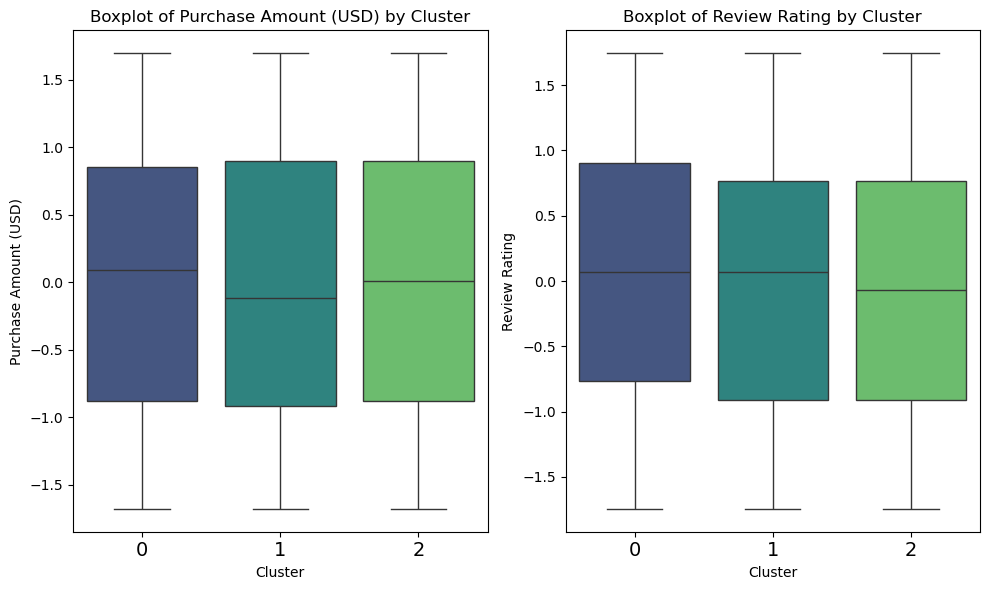

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_98146/3646077509.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=datasets, ax=axes[i], palette='viridis')
/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_98146/3646077509.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=datasets, ax=axes[i], palette='viridis')


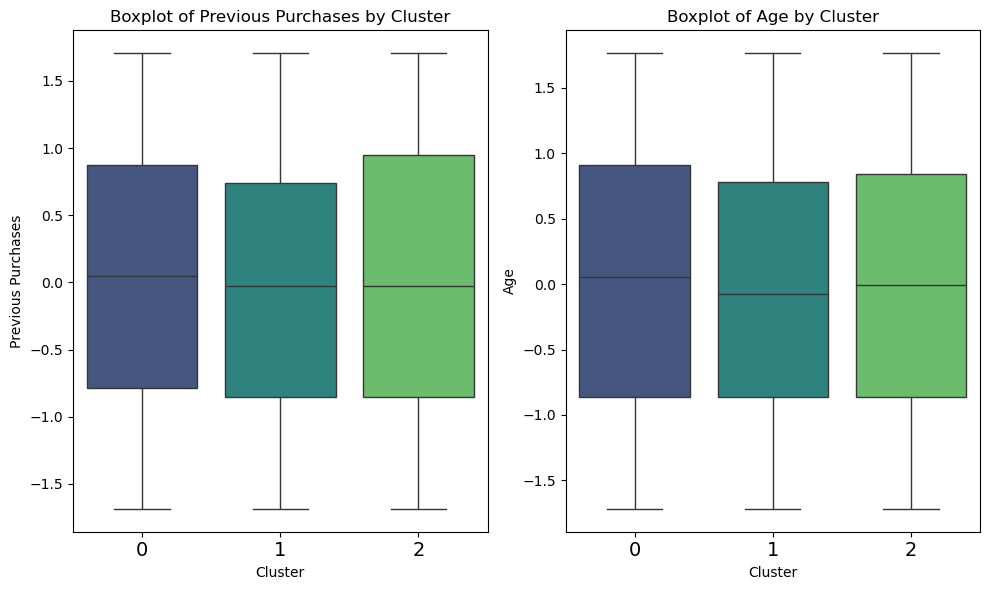

In [38]:
# Define the numeric columns
numeric_data = ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Age']

# Number of columns per figure
n_cols = 2

# Calculate the number of figures needed
n_images = math.ceil(len(numeric_data) / n_cols)

# Loop to create separate figures
for img_num in range(n_images):
    start_idx = img_num * n_cols
    end_idx = min((img_num + 1) * n_cols, len(numeric_data))
    
    # Determine the number of rows for the current figure
    n_rows = math.ceil((end_idx - start_idx) / n_cols)
    
    # Create a figure for the current group of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6 * n_rows))
    
    # Flatten the axes array for easier access
    axes = axes.flatten()

    # Loop through the numeric columns for this figure
    for i, col in enumerate(numeric_data[start_idx:end_idx]):
        if i < len(axes):  # Ensure we don't access non-existent subplots
            sns.boxplot(x='Cluster', y=col, data=datasets, ax=axes[i], palette='viridis')
            axes[i].set_title(f"Boxplot of {col} by Cluster")
            axes[i].tick_params(axis='x', labelsize=14, rotation=0)

    # Hide unused subplots
    for j in range(len(numeric_data[start_idx:end_idx]), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

## Cluster Characteristics for each columns

1. Size
For the size i dont see any differences for each cluster. This is indicates that size one of the least feature that differenciates the clustering. We can see for each cluster :
- Cluster 0 = the main is in Medium
- Cluster 1 = The main is also medium
- Cluster 2 : also medium
so we can said that Size is not a feature that indicates differences for each cluster because not only the top size is medium but the three of them follow up by the same size, from medium to large to small and ended up to xl.
another reason is probably people when they're shopping they like size that is not small and not that big. Yup in the middle thats why we see the most purchased size is medium and follow up by size
Conclusion :
Size doesnt affect the clustering.

2. Season
next up is season for a season we see a slight difference in each cluster. we can see that:
- cluster 0 : for cluster 0 we can see the most purchased is in the spring season follow up by summer, next is winter and end up for the least one is fall. So we can conclude cluster 0 like to purchased in spring but not in fall.
- Cluster 1 : for cluster 1 like a middle cluster i can said because cluster one likes to shop in all of the seasons but dominant to fall and winter season judging from the graph.
- Cluster 2 : For cluster 2 we can see that it like to shop almost in all season with fall is the most purchased for cluster 2. Unfortunate for cluster 2 that there's a quite a huge difference in the graph from cluster 1 that cluster 2 doesnt like to shop in summer season judging from the lowest score from all the season.
Conclusion
- Cluster 0 : dominant to spring
- Cluster 1 : Flexible in all season but dominant to Fall
- Cluster 2 : Also dominant to fall but rarely in Summer

3. Payment Method
next up is payment Method we can see that:
- Cluster 0 : dominant to using Virtual Account followed up by cash and Transfer Bank
- Cluster 1 : dominant to Credit card with Debit Card its second use and Transfer bank its third and last.
- Cluster 2 : Different from all the cluster, cluster 2 is using all the difference method of payment with virtual account the highest one.
Conclusion:
Cluster 0 : Virtual Account
Cluster 1 : Credit Card
Cluster 2 : Flexible dominant Virtual Account

4. Shipping Type
Shipping type is ranged from free to cheap to pay to expensive we can see a significant differences here from all of the clusters:
- Cluster 0 : Is using the Free shipping as the main option accompanied with store pick up and standard way. The least uses is the 2 day shipping. This indicates that cluster 0 likes something cheap. or i can say Cina.
- Cluster 1 : Cluster one is also showing the same shipping method as Cluster 0 but what difference is that cluster 1 likes to use standard method. But we can also see that free shipping and Store pick up not far away from the standard method.
- Cluster 2 : Differences with all of the two cluster that cluster 2 is rich. It uses only 3 method and its all expensive method, the 2 day, the next day and the express way. OMAIGAT no complain and no further explanation needed. This cluster 2 is rich. o for the dominant one is the next day but express not falling far behind.

Conclusion:
Cluster 0 : likes the free and pick up
Cluster 1 : Likes the Standard and Pick Up way
Cluster 2 : Likes the expensive way or i can say next day and express way

5. Frequency of Purchases
for frequency all of the cluster has all of the criteria (annually, monthly, etc) but im gonna take only the dominan and the least dominan because we can see the differences from that. 
Cluster 0 : dominant coming back to the store every 3 months and the least one is weekly. Well with the shipping type free and store pick up i can said that this cluster is a cluster that likes cheap and discount stuff. Anyways we can conclude as well that cluster 0 like something new because a shop usually refresh it's clothes and etc in one-two months so by the time they're back shopping they will see new things.
Cluster 1 : Cluster 1 is dominant for coming back Bi-weekly which mean once in two weeks with the least one is annually. It means that cluster 1 is likely enjoying the things in the store seeing the return is dominant once in two weeks
cluster 2 : in the other hand, Cluster 2 is basically the same with cluster 0 for the dominant, i can say indicating that people's behavior like to see new things when they return but the least one is annually.
Conclusion:
Cluster 0 : Coming back Quarterly and least on weekly
Cluster 1 : Coming back Bi-Weekly and least on Annually
Cluster 2 : i Can said this is like the combination of cluster 0 and 1 , dominant on Quarterly and least on Annually likes Cluster 1

6. Categories
For categories there are 4 split tabels, that is Clothing, FootWear, Outwear and Accesories. Now lets see the difference for each clusters:
- CLuster 0 : for the most purchased for cluster 0 is the clothing section followed up by accesories , footwear and outwear. First of all i can said they like to bought Clothing than outwear (like jacket sweater etc). It is because the season they usually purchased is at spring not winter. The second reason because the data kinda inbalance that we can see the clothing has the most data next accesories , footwear nad the least is the outwear.
- Cluster 1 : The same as Cluster 0, the most is Clothing followed up by accesories, third is footwear , and last is outwear.
- Cluster 2 : The same as well.
Conclusion:
Categories doesnt conclude cluster 0,1 or 2. This is might because the data is inbalance just like size data. Inbalancing could be some troublesome in clustering.

7. Preferred Payment Methods
Also spread as 5 graphs, Cash, Virtual Account, Bank Transfer, Credit Card, and Debit Card
so for this as well i just conclude this it is because i fuse the venmo and paypal method as one column virtual account. We can see that the Virtual Account is the highest for each methods. So well gonna see the second highest for each cluster.
Cluster 0 : Cash , the old fashioned way
Cluster 1 : Credit Card, the wait way and rotten in debts :v
Cluster 3 : Credit Card.
So yes the conclusion is come to the second highest as virtual account is the main for each one.

8. gender
So for gender the dominant one is the Female to purchased in our shop, we can also see that the customer cluster is so many in cluster 2 followed up by cluster 0 and cluster 1 has the lowest customer segment

9. Subscription Status
we can see that for :
Cluster 0, 1 and 2 dominant doesnt have subscription status this is could because the benefits it kinda low to purchased or subscript so yeah in the future works we need to see what the status offers to the customer to know more about the clusters.

10. Promotion
For the promotion
Cluster 0 : the average use of promo code and discount
Cluster 1 : the lowest use of promo code and discount
Cluster 2 : the highest use of promo code and discount

11. Purchase Amount (USD)
Cluster 0: The median purchase amount is slightly higher than Cluster 1 and 2, indicating customers in this cluster might spend marginally more.
Cluster 1: The distribution shows a slightly lower median, but it has similar variability compared to the other clusters.
Cluster 2: This cluster has a comparable median and spread to the others, indicating no significant outliers or drastic differences in purchase amount across clusters.
12. Review Rating 
Cluster 0: The median review rating is neutral (near zero), with a slightly wider interquartile range (IQR) compared to other clusters.
Cluster 1: The median is similar to Cluster 0, with a slightly tighter distribution, suggesting more consistency in customer reviews.
Cluster 2: The median and spread closely resemble Cluster 1, showing little variation in review ratings across clusters.
13. Previous Purchases 
Cluster 0: The median is neutral, with a slightly higher upper whisker compared to other clusters, which might indicate some customers in this cluster are frequent buyers.
Cluster 1: The distribution has a tighter IQR, suggesting customers in this cluster are more uniform in their purchase history.
Cluster 2: This cluster’s distribution is wider, implying variability in customer purchase history.
14. Age 
Cluster 0: The median age is close to the other clusters, with a similar spread, indicating balanced representation.
Cluster 1: Slightly lower variability in age compared to other clusters, showing a narrower range of customer age.
Cluster 2: A wider distribution in age is observed, suggesting this cluster might represent a broader age group.



# Cluster Characteristic

<Axes: >

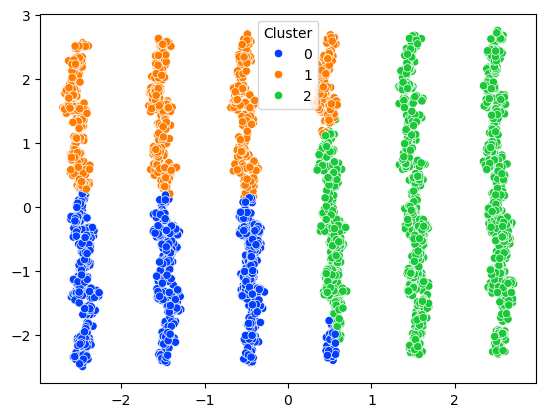

In [41]:
sns.scatterplot(x=datasets_pca[:,0], y=datasets_pca[:,1], hue=datasets['Cluster'], palette='bright')

# Cluster 0: The "Value-Oriented Shoppers"
- Size & Categories: Preferences are similar to other clusters, with a dominant purchase of medium-sized clothing and accessories. These features don’t differentiate this cluster much.
- Season: Dominates purchases during the spring season but rarely shops in the fall.
- Payment Methods: Primarily uses Virtual Account, followed by Cash. They favor simple, low-cost payment methods.
- Shipping Type: Heavily reliant on free shipping and store pickup, highlighting a preference for cost-effective options.
- Frequency of Purchases: Typically returns quarterly and is the least likely to shop weekly, indicating they plan purchases based on seasonal cycles or refresh intervals.
- Gender: Composed mostly of female shoppers.
- Subscription Status: Most customers do not have subscriptions, suggesting this cluster is less motivated by loyalty programs.
- Promotion: Moderate use of promo codes and discounts, indicating they value promotions but are not overly reliant on them.
- Purchase Amount: Slightly higher median spending compared to others but still modest.
- Review Rating: Neutral but slightly inconsistent reviews.
- Previous Purchases: Balanced history of previous purchases, with a small group being frequent buyers.
- Age: Balanced age representation, reflecting a mix of demographics.
# Summary: Cluster 0 represents customers who prioritize value, discounts, and cost-effective shopping habits, often returning seasonally and showing moderate loyalty to promotions.

# Cluster 1: The "Consistent Middle-Class Shoppers"
- Size & Categories: Similar to Cluster 0, with medium-sized clothing being the most purchased, followed by accessories.
- Season: Purchases are well-distributed across all seasons, with a slight preference for fall and winter.
- Payment Methods: Prefers Credit Card payments, followed by Debit Card, indicating a more traditional payment behavior.
- Shipping Type: Slight preference for standard shipping, with free shipping and store pickup also popular.
- Frequency of Purchases: Purchases bi-weekly, showing a consistent shopping habit, and least likely to shop annually.
- Gender: Contains the lowest customer segment, with a higher female composition.
- Subscription Status: Similar to others, the majority are non-subscribers.
- Promotion: The lowest use of promo codes and discounts, indicating less reliance on promotions to make purchases.
- Purchase Amount: Median spending is slightly lower, suggesting a moderate but steady spending pattern.
- Review Rating: Neutral reviews with tighter consistency, indicating reliable but not highly enthusiastic feedback.
- Previous Purchases: Uniform purchase history, showing consistency in shopping behavior.
- Age: Slightly narrower age distribution, suggesting a more specific demographic.
# Summary: Cluster 1 consists of regular shoppers who exhibit steady and consistent purchasing habits. They are less price-sensitive, relying less on promotions and preferring traditional payment methods.

# Cluster 2: The "Premium and Flexible Shoppers"
- Size & Categories: Similar to other clusters in size and categories, dominated by medium-sized clothing, but this cluster stands out due to more - diverse behavior in other features.
- Season: Prefers fall for shopping but shops less during summer, indicating seasonal sensitivity.
- Payment Methods: Primarily uses Virtual Account, but is more flexible, utilizing all payment methods equally.
- Shipping Type: Prefers expensive and premium shipping methods, such as next-day and express shipping, emphasizing convenience and luxury.
- Frequency of Purchases: Returns quarterly, similar to Cluster 0, but least likely to shop annually, indicating regular engagement with new products.
- Gender: Largest customer segment with a high representation of female shoppers.
- Subscription Status: Similar to other clusters, with most customers not subscribed, but the flexibility in their behaviors suggests potential for subscription-based benefits.
- Promotion: Highest usage of promo codes and discounts, highlighting a strong preference for cost-saving opportunities.
- Purchase Amount: Median spending is comparable to others, indicating balanced spending patterns despite using premium services.
- Review Rating: Neutral ratings with consistency similar to Cluster 1.
- Previous Purchases: Displays a broader variability in purchase history, reflecting a wider customer base.
- Age: Has the widest age distribution, indicating appeal across demographics.
# Summary: Cluster 2 represents premium, flexible shoppers who value convenience and luxury but also take advantage of promotions and discounts. Their diverse behaviors make them an appealing segment for premium and flexible offerings.

# FINAL CONCLUSION

# - Cluster 0: Value-oriented customers who prioritize cost-saving measures such as free shipping and moderate promotions, shopping primarily during spring. Marketing strategies should focus on seasonal discounts and affordable pricing.

# - Cluster 1: Consistent and traditional shoppers who are less influenced by promotions but exhibit steady purchasing habits. Strategies should emphasize reliability and product availability across seasons.

# - Cluster 2: Premium shoppers who combine luxury shipping preferences with a love for promotions, making them the most flexible and diverse cluster. Marketing should focus on premium experiences, exclusive discounts, and convenient services.
